<a href="https://colab.research.google.com/github/LucasSFlores80/Data-Science-II/blob/main/Proyecto_Energ%C3%ADa_E%C3%B3lica_Data_Science_II_Flores_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perspectivas de Inversión en Energía Eólica en América Latina

Este proyecto tiene como objeto analizar la viabilidad para la instalación de parques eólicos en América Latina por parte de una empresa internacional, pionera en generación de electricidad por fuentes eólicas.

Los países de interes son: Argentina, Chile, Uruguay, Brasil, Paraguay, Bolivia, Perú y Ecuador.

La empresa ha solicitado realizar un estudio introductorio teniendo en cuenta la producción, demanda e importación de electricidad. De ser factible la instalación de estos parques eólicos, se deberá continuar con un estudio económico que no se incluye en este trabajo.

Esta empresa, sabe que la instalación de parques eólicos requiere una gran inversión inicial y debe ser competitiva en los países donde pretende instalarse. Para ello, establece ciertos parámetros a tener en cuenta antes de tomar una decisión.

Las hipótesis que se plantean son las siguientes:

- La empresa continuará con el estudio económico en distintos países siempre y cuando, la producción sea menor a la demanda en los últimos 20 años (2004-2023).
- La generación de electricidad por fuentes renovables eólicas no debe superar los 24 TWh en los dos últimos años de estudio (2022-2023). Este valor se toma considerando que, en promedio, un generador eólico produce 0,006 TWh al año. Por lo que la empresa deberá invertir en 4000 generadores.
- La producción de energía eléctrica de tipo eólica no debe superar el 10% de participación en el mercado interno en el último año de estudio (2023).
- La generación de electricidad por fuentes eólicas no debe superar el 5% de aporte al mercado interno del país de interés durante los últimos 20 años.

A medida que avance el proyecto surgirán distintas preguntas resultado del análisis de los datos. Como por ejemplo:

a) ¿Existe algún país de América Latina que produzca más de lo que demanda? ¿A qué se debe?

b) ¿Cuál es la fuente principal de generación de electricidad en los países estudiados?

c) ¿La generación de electricidad por fuentes eólicas han mostrado un crecimiento a los largo de los años?

# Procesamiento del Dataset Original

El dataset es una recopilación del Banco Mundial y se descarga desde: https://github.com/owid/energy-data

Este dataset cuenta con la información de producción, demanda y consumo de combustibles, energías de distintos tipos en todo el mundo y emisiones de gases de efecto invernadero. La información es muy extensa y es necesario realizar un preprocesamiento de los datos.

In [40]:
# Importación de Librerías más importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import kurtosis

In [41]:
# Se carga el dataset desde Github
data = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv')
data.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [42]:
data.shape

(21812, 130)

Consta de 21812 filas y 130 columnas. Es decir, 2.835.560 datos de diferentes tipos.
Los tipos de variables son:
- País es categórica nominal.
- Año es cuantitativa discreta
- Las demás variables son cuantitativas continuas

In [43]:
# Si se quiere mostrar información del dataset, por la cantidad de entradas, no alcanza a verse lo que nos pueden mostrar las columnas.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Columns: 130 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(2)
memory usage: 21.6+ MB


Datos Nulos:

<Axes: >

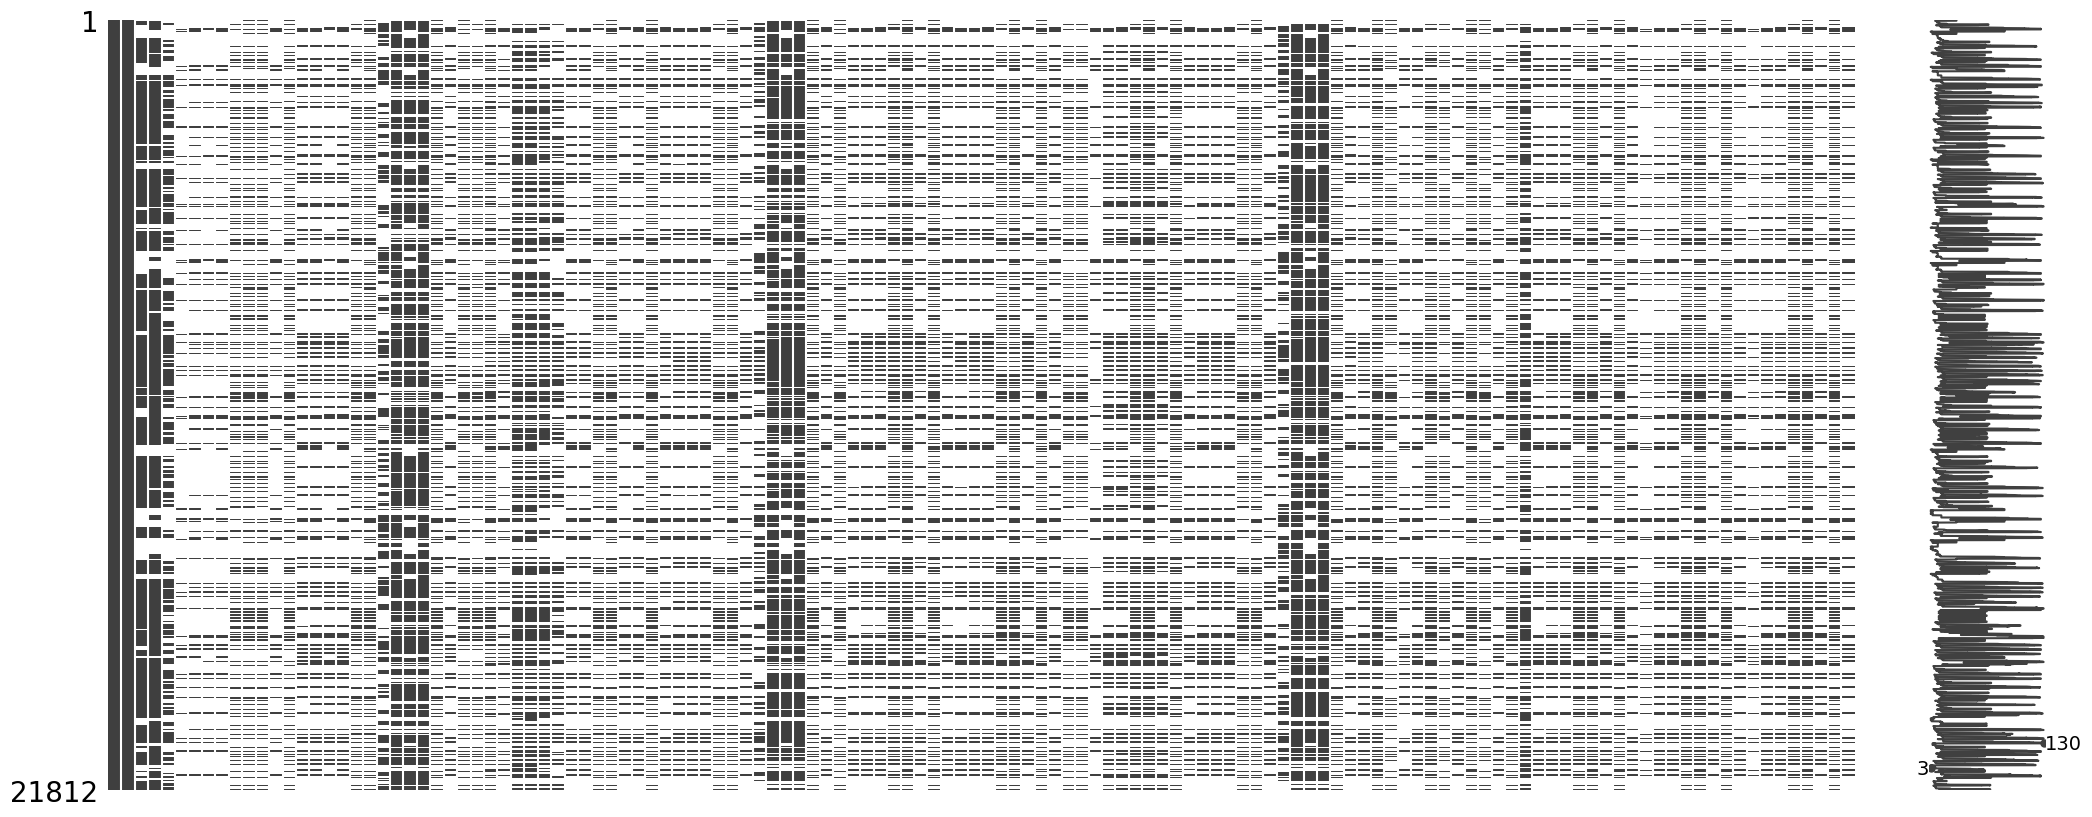

In [44]:
msno.matrix(data)

In [45]:
# El total de datos nulos son 1.908.853
data.isnull().sum().sum()

1908853

In [46]:
# Los datos no nulos son:
datos_no_nulos = 2835560 - 1908853
datos_no_nulos

926707

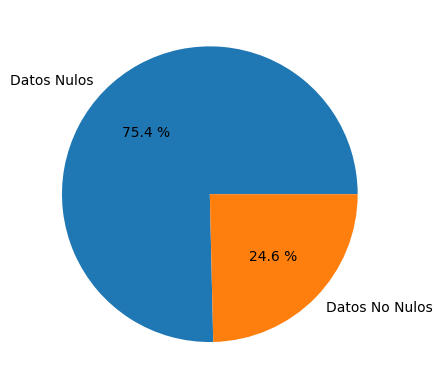

In [47]:
# Se genera un gráfico de torta mostrando el porcentaje de datos nulos y no nulos del dataset original.
valores = [2835560,926707]
nombres = ['Datos Nulos','Datos No Nulos']
plt.pie(valores, labels=nombres, autopct='%0.1f %%')
plt.show()

Más del 75% de los datos son nulos. Esto se debe principalmente, a que no se registran todos los datos de energía en muchos de los países. Posiblemente, no producen, consumen o utilizan estas fuentes y por eso no hay registros. Si se decide eliminar los datos nulos del dataset sucede lo siguiente:

In [48]:
data.dropna(inplace=True)

In [49]:
data

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
3337,Bulgaria,2009,BGR,7634737.0,1.073651e+11,200.106,0.041,8.078,0.062,1.310,...,0.000,0.005,94.656,0.320,0.662,31.435,0.24,86.696,0.567,0.327
3338,Bulgaria,2010,BGR,7592271.0,1.090452e+11,199.971,0.123,24.367,0.185,5.269,...,0.022,0.020,187.487,1.229,1.891,89.565,0.68,249.095,1.481,0.894
3339,Bulgaria,2011,BGR,7543128.0,1.094354e+11,5.558,0.010,25.889,0.195,7.954,...,0.200,0.124,26.377,0.484,2.375,114.011,0.86,314.918,1.721,1.058
3340,Bulgaria,2012,BGR,7488347.0,1.102615e+11,399.988,0.781,130.387,0.976,9.348,...,1.679,1.000,41.784,0.972,3.348,162.920,1.22,447.044,2.626,1.569
3341,Bulgaria,2013,BGR,7431169.0,1.096435e+11,29.912,0.292,170.692,1.268,14.803,...,3.231,1.915,12.500,0.396,3.743,184.359,1.37,503.742,3.185,1.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20487,United States,2018,USA,332140032.0,1.812469e+13,-1.325,-5.433,1218.223,404.621,186.156,...,2.222,0.932,7.222,45.081,728.691,820.949,272.67,2193.926,6.490,2.722
20488,United States,2019,USA,334319680.0,1.854055e+13,2.780,11.250,1243.930,415.870,172.021,...,2.570,1.071,8.514,59.126,787.816,885.021,295.88,2356.476,7.115,2.964
20489,United States,2020,USA,335942016.0,1.802736e+13,-9.029,-37.549,1126.150,378.321,162.826,...,3.233,1.408,14.214,108.672,896.488,1005.947,337.94,2668.579,8.358,3.641
20490,United States,2021,USA,336997632.0,1.909938e+13,9.917,37.518,1233.954,415.839,160.980,...,3.958,1.674,11.913,103.127,999.615,1122.263,378.20,2966.237,9.105,3.851


Quedan 138 filas x 130 columnas que contienen 17.940 datos. Se han eliminado 2.817.620 datos.

Como se van a analizar países de Latinoamérica, hay que determinar si todavía están en el dataset limpio de NaN.

In [50]:
data.loc[(data['country']=='Argentina') | (data['country']=='Bolivia') | (data['country']=='Chile') | (data['country']=='Colombia') | (data['country']=='Ecuador') | (data['country']=='Paraguay') | (data['country']=='Perú') | (data['country']=='Uruguay')]

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy


Al no encontrarse estos países en estudio, se decide no eliminar los datos y tampoco cambiarlos por un 0.0 ya que se prefiere ir analizando los nulos a medida que avanza el proyecto.

In [51]:
# Se vuelve a cargar el dataset desde Github
data = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv')
data

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21807,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,NaN,NaN,NaN,NaN,12.374,...,0.353,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21808,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,NaN,NaN,NaN,NaN,6.382,...,0.298,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21809,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,NaN,NaN,NaN,NaN,0.000,...,0.236,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21810,Zimbabwe,2022,ZWE,16320539.0,2.590159e+10,NaN,NaN,NaN,NaN,6.127,...,0.336,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


La misma página de Github donde se tomó el datset original, ofrece un dataset con el detalle de las columnas, unidades y sus fuentes.

In [52]:
codigos = pd.read_csv('https://raw.githubusercontent.com/LucasSFlores80/Data-Science-II/refs/heads/main/owid-energy-codebook.csv')
codigos

,column,description,unit,source
0,country,Country - Geographic location.,NaN,Our World in Data - Regions (2023)
1,year,Year - Year of observation.,NaN,Our World in Data - Regions (2023)
2,iso_code,ISO code - ISO 3166-1 alpha-3 three-letter cou...,NaN,International Organization for Standardization...
3,population,"Population - Population by country, available ...",persons,Population based on various sources (2023) [ht...
4,gdp,Gross domestic product (GDP) - This data is ad...,international-$ in 2011 prices,Bolt and van Zanden - Maddison Project Databas...
...,...,...,...,...
125,wind_elec_per_capita,Electricity generation from wind power per per...,kilowatt-hours,Ember - Yearly Electricity Data (2024) [https:...
126,wind_electricity,Electricity generation from wind power - Measu...,terawatt-hours,Ember - Yearly Electricity Data (2024) [https:...
127,wind_energy_per_capita,Wind power consumption per capita - Measured i...,kilowatt-hours,Energy Institute - Statistical Review of World...
128,wind_share_elec,Share of electricity generated by wind power -...,%,Ember - Yearly Electricity Data (2024) [https:...


Las variables que se van a tener en cuenta son todas aquellas relacionadas con la generación, demanda e importación de energía eléctrica por diferentes fuentes:

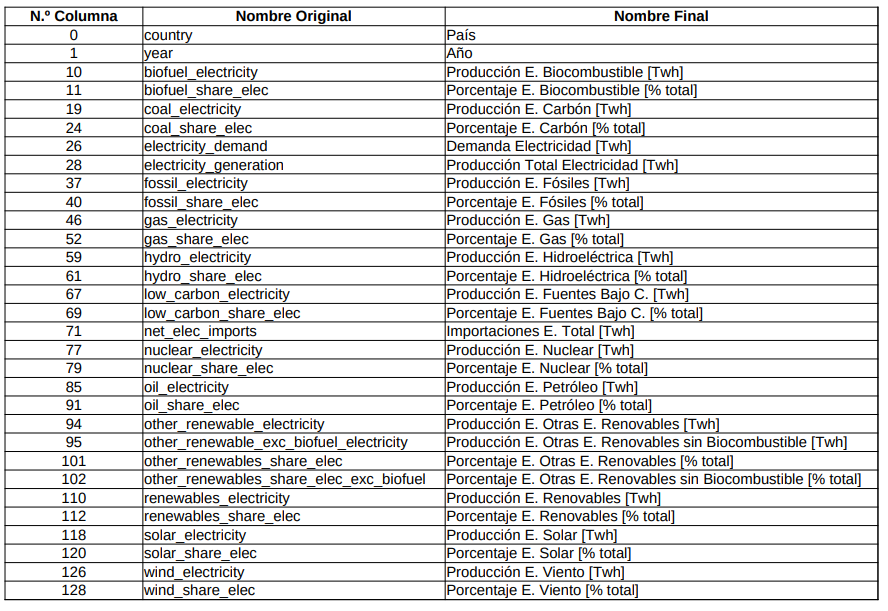

Las unidades son:

- TWh = kilowatts hora

- % total = porcentaje de energía por fuente respecto al total de generación por todas las fuentes.

In [53]:
# Se hace el primer filtrado de los datos
electricidad = data[['country','year','biofuel_electricity','biofuel_share_elec','coal_electricity','coal_share_elec','electricity_demand','electricity_generation','fossil_electricity','fossil_share_elec','gas_electricity','gas_share_elec','hydro_electricity','hydro_share_elec','low_carbon_electricity','low_carbon_share_elec','net_elec_imports','nuclear_electricity','nuclear_share_elec','oil_electricity','oil_share_elec','other_renewable_electricity','other_renewable_exc_biofuel_electricity','other_renewables_share_elec','other_renewables_share_elec_exc_biofuel','renewables_electricity','renewables_share_elec','solar_electricity','solar_share_elec','wind_electricity','wind_share_elec']]
electricidad.head()

,country,year,biofuel_electricity,biofuel_share_elec,coal_electricity,coal_share_elec,electricity_demand,electricity_generation,fossil_electricity,fossil_share_elec,...,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,renewables_electricity,renewables_share_elec,solar_electricity,solar_share_elec,wind_electricity,wind_share_elec
0,ASEAN (Ember),2000,5.87,1.550,76.03,20.081,378.61,378.61,305.36,80.653,...,22.80,16.93,6.022,4.472,73.25,19.347,0.0,0.0,0.0,0.0
1,ASEAN (Ember),2001,6.46,1.596,86.26,21.307,404.85,404.85,327.66,80.934,...,22.86,16.40,5.647,4.051,77.19,19.066,0.0,0.0,0.0,0.0
2,ASEAN (Ember),2002,6.62,1.528,93.43,21.568,433.19,433.19,356.67,82.336,...,23.23,16.61,5.363,3.834,76.52,17.664,0.0,0.0,0.0,0.0
3,ASEAN (Ember),2003,7.45,1.626,102.01,22.261,458.24,458.24,381.84,83.328,...,23.19,15.74,5.061,3.435,76.40,16.672,0.0,0.0,0.0,0.0
4,ASEAN (Ember),2004,8.40,1.692,115.01,23.161,496.56,496.56,418.60,84.300,...,24.97,16.57,5.029,3.337,77.96,15.700,0.0,0.0,0.0,0.0


In [54]:
# Se observa que la selección realizada es correcta
electricidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  21812 non-null  object 
 1   year                                     21812 non-null  int64  
 2   biofuel_electricity                      5834 non-null   float64
 3   biofuel_share_elec                       5811 non-null   float64
 4   coal_electricity                         6709 non-null   float64
 5   coal_share_elec                          6686 non-null   float64
 6   electricity_demand                       5863 non-null   float64
 7   electricity_generation                   7411 non-null   float64
 8   fossil_electricity                       6728 non-null   float64
 9   fossil_share_elec                        6700 non-null   float64
 10  gas_electricity                          6613 

Se cambian los nombres de las columnas y se coloca su unidad de medida

In [55]:
def cambiar_nombres_columnas_auto(electricidad, nuevos_nombres):
    electricidad.columns = nuevos_nombres
    return electricidad
nuevos_nombres = ['País','Año','Producción E. Biocombustible [TWh]','Porcentaje E. Biocombustible [% total]','Producción E. Carbón [TWh]','Porcentaje E. Carbón [% total]','Demanda Electricidad [TWh]','Producción Total Electricidad [TWh]','Producción E. Fósiles [TWh]','Porcentaje E. Fósiles [% total]','Producción E. Gas [TWh]','Porcentaje E. Gas [% total]','Producción E. Hidroeléctrica [TWh]','Porcentaje E. Hidroeléctrica [% total]','Producción E. Fuentes Bajo C. [TWh]','Porcentaje E. Fuentes Bajo C. [% total]','Importaciones E. Total [TWh]','Producción E. Nuclear [TWh]','Porcentaje E. Nuclear [% total]','Producción E. Petróleo [TWh]','Porcentaje E. Petróleo [% total]','Producción E. Otras E. Renovables [TWh]','Producción E. Otras E. Renovables sin Biocombustible [TWh]','Porcentaje E. Otras E. Renovables [% total]','Porcentaje E. Otras E. Renovables sin Biocombustible [% total]','Producción E. Renovables [TWh]','Porcentaje E. Renovables [% total]','Producción E. Solar [TWh]','Porcentaje E. Solar [% total]','Producción E. Viento [TWh]','Porcentaje E. Viento [% total]']
final = cambiar_nombres_columnas_auto(electricidad, nuevos_nombres)

In [56]:
# Este es el nuevo dataset con los nuevos nombres
final.head()

,País,Año,Producción E. Biocombustible [TWh],Porcentaje E. Biocombustible [% total],Producción E. Carbón [TWh],Porcentaje E. Carbón [% total],Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Producción E. Fósiles [TWh],Porcentaje E. Fósiles [% total],...,Producción E. Otras E. Renovables [TWh],Producción E. Otras E. Renovables sin Biocombustible [TWh],Porcentaje E. Otras E. Renovables [% total],Porcentaje E. Otras E. Renovables sin Biocombustible [% total],Producción E. Renovables [TWh],Porcentaje E. Renovables [% total],Producción E. Solar [TWh],Porcentaje E. Solar [% total],Producción E. Viento [TWh],Porcentaje E. Viento [% total]
0,ASEAN (Ember),2000,5.87,1.550,76.03,20.081,378.61,378.61,305.36,80.653,...,22.80,16.93,6.022,4.472,73.25,19.347,0.0,0.0,0.0,0.0
1,ASEAN (Ember),2001,6.46,1.596,86.26,21.307,404.85,404.85,327.66,80.934,...,22.86,16.40,5.647,4.051,77.19,19.066,0.0,0.0,0.0,0.0
2,ASEAN (Ember),2002,6.62,1.528,93.43,21.568,433.19,433.19,356.67,82.336,...,23.23,16.61,5.363,3.834,76.52,17.664,0.0,0.0,0.0,0.0
3,ASEAN (Ember),2003,7.45,1.626,102.01,22.261,458.24,458.24,381.84,83.328,...,23.19,15.74,5.061,3.435,76.40,16.672,0.0,0.0,0.0,0.0
4,ASEAN (Ember),2004,8.40,1.692,115.01,23.161,496.56,496.56,418.60,84.300,...,24.97,16.57,5.029,3.337,77.96,15.700,0.0,0.0,0.0,0.0


In [57]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Data columns (total 31 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   País                                                            21812 non-null  object 
 1   Año                                                             21812 non-null  int64  
 2   Producción E. Biocombustible [TWh]                              5834 non-null   float64
 3   Porcentaje E. Biocombustible [% total]                          5811 non-null   float64
 4   Producción E. Carbón [TWh]                                      6709 non-null   float64
 5   Porcentaje E. Carbón [% total]                                  6686 non-null   float64
 6   Demanda Electricidad [TWh]                                      5863 non-null   float64
 7   Producción Total Electricidad [TWh]              

<Axes: >

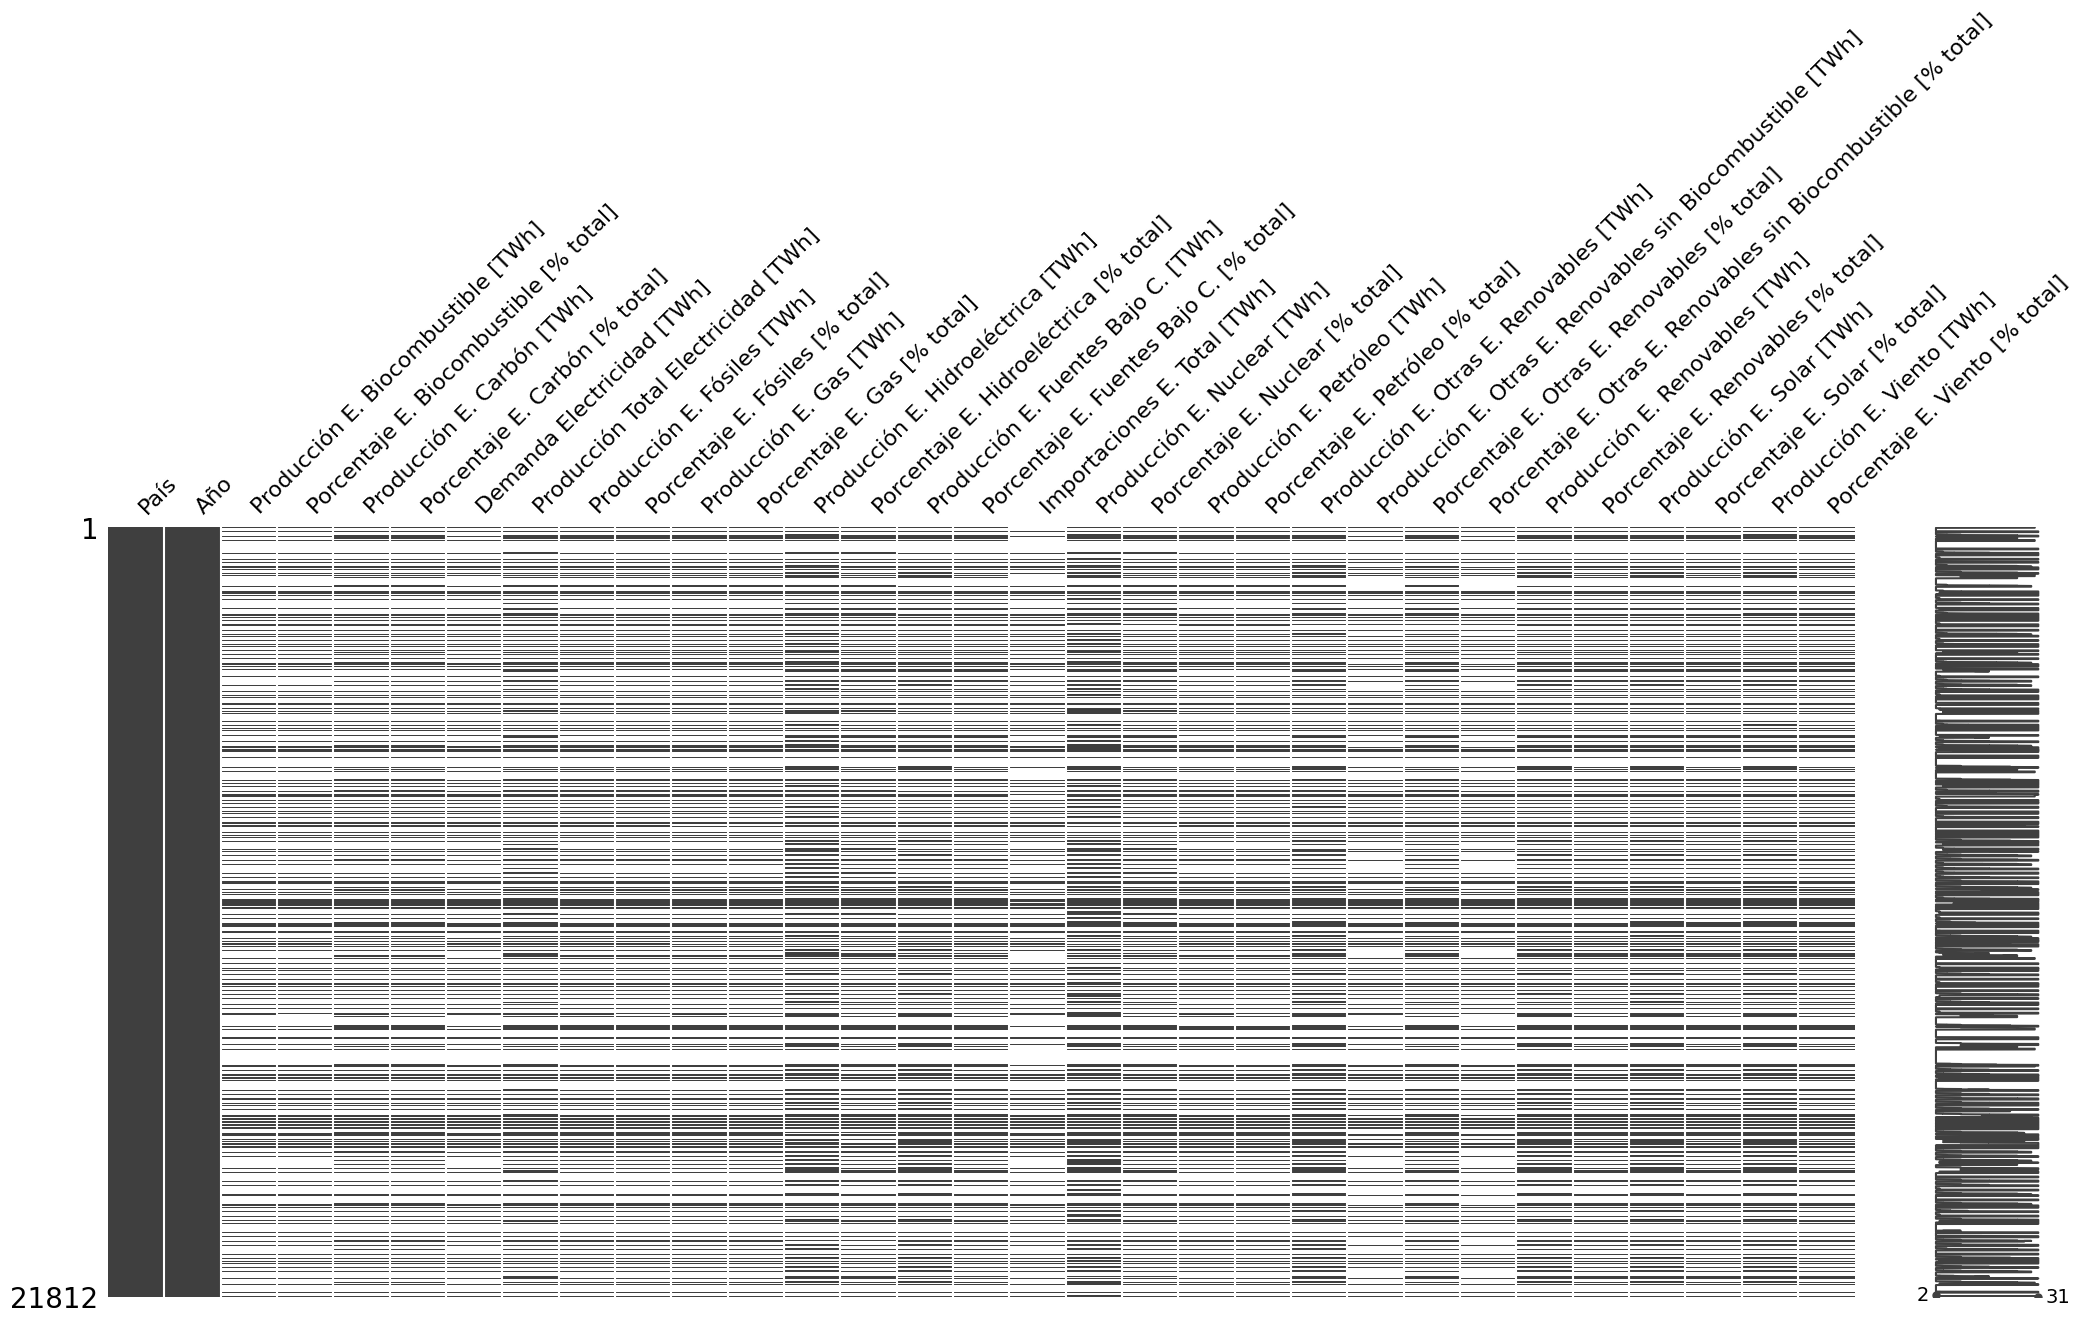

In [58]:
# Se genera un gráfico para observar el dataset respecto a la calidad de los datos
msno.matrix(final)

In [59]:
# Todavía quedan muchos datos nulos
final.isnull().sum().sum()

428291

# Dataset América Latina

Se seleccionan 8 países de América Latina donde la empresa desea instalarse. Estos son:

- Argentina

- Uruguay

- Brasil

- Chile

- Paraguay

- Bolivia

- Ecuador

- Perú

Además, se filtran los datos de producción de energía en los últimos 20 años. Es decir, desde el 2004 al 2023 inclusive.

In [60]:
america_latina = final.loc[((final['País'] == 'Uruguay') | (final['País'] == 'Argentina') | (final['País'] == 'Brazil') | (final['País'] == 'Chile')| (final['País'] == 'Bolivia') | (final['País'] == 'Peru') | (final['País']=='Paraguay') | (final['País']=='Ecuador')) & (final['Año']>=2004)]
america_latina.head()

,País,Año,Producción E. Biocombustible [TWh],Porcentaje E. Biocombustible [% total],Producción E. Carbón [TWh],Porcentaje E. Carbón [% total],Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Producción E. Fósiles [TWh],Porcentaje E. Fósiles [% total],...,Producción E. Otras E. Renovables [TWh],Producción E. Otras E. Renovables sin Biocombustible [TWh],Porcentaje E. Otras E. Renovables [% total],Porcentaje E. Otras E. Renovables sin Biocombustible [% total],Producción E. Renovables [TWh],Porcentaje E. Renovables [% total],Producción E. Solar [TWh],Porcentaje E. Solar [% total],Producción E. Viento [TWh],Porcentaje E. Viento [% total]
1116,Argentina,2004,0.87,0.868,1.68,1.676,103.73,100.26,60.99,60.832,...,0.868,NaN,0.865,NaN,31.40,31.319,0.0,0.0,0.07,0.070
1117,Argentina,2005,0.92,0.870,2.18,2.061,109.63,105.75,63.67,60.208,...,0.916,NaN,0.867,NaN,35.21,33.296,0.0,0.0,0.07,0.066
1118,Argentina,2006,1.05,0.926,1.99,1.754,115.79,113.43,66.57,58.688,...,1.046,NaN,0.922,NaN,39.14,34.506,0.0,0.0,0.07,0.062
1119,Argentina,2007,1.07,0.943,2.34,2.061,121.12,113.52,73.92,65.116,...,1.071,NaN,0.943,NaN,32.35,28.497,0.0,0.0,0.06,0.053
1120,Argentina,2008,1.21,0.993,1.94,1.591,127.39,121.91,82.07,67.320,...,1.206,NaN,0.989,NaN,32.45,26.618,0.0,0.0,0.04,0.033


In [61]:
america_latina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1116 to 20777
Data columns (total 31 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   País                                                            160 non-null    object 
 1   Año                                                             160 non-null    int64  
 2   Producción E. Biocombustible [TWh]                              140 non-null    float64
 3   Porcentaje E. Biocombustible [% total]                          140 non-null    float64
 4   Producción E. Carbón [TWh]                                      160 non-null    float64
 5   Porcentaje E. Carbón [% total]                                  160 non-null    float64
 6   Demanda Electricidad [TWh]                                      160 non-null    float64
 7   Producción Total Electricidad [TWh]                  

<Axes: >

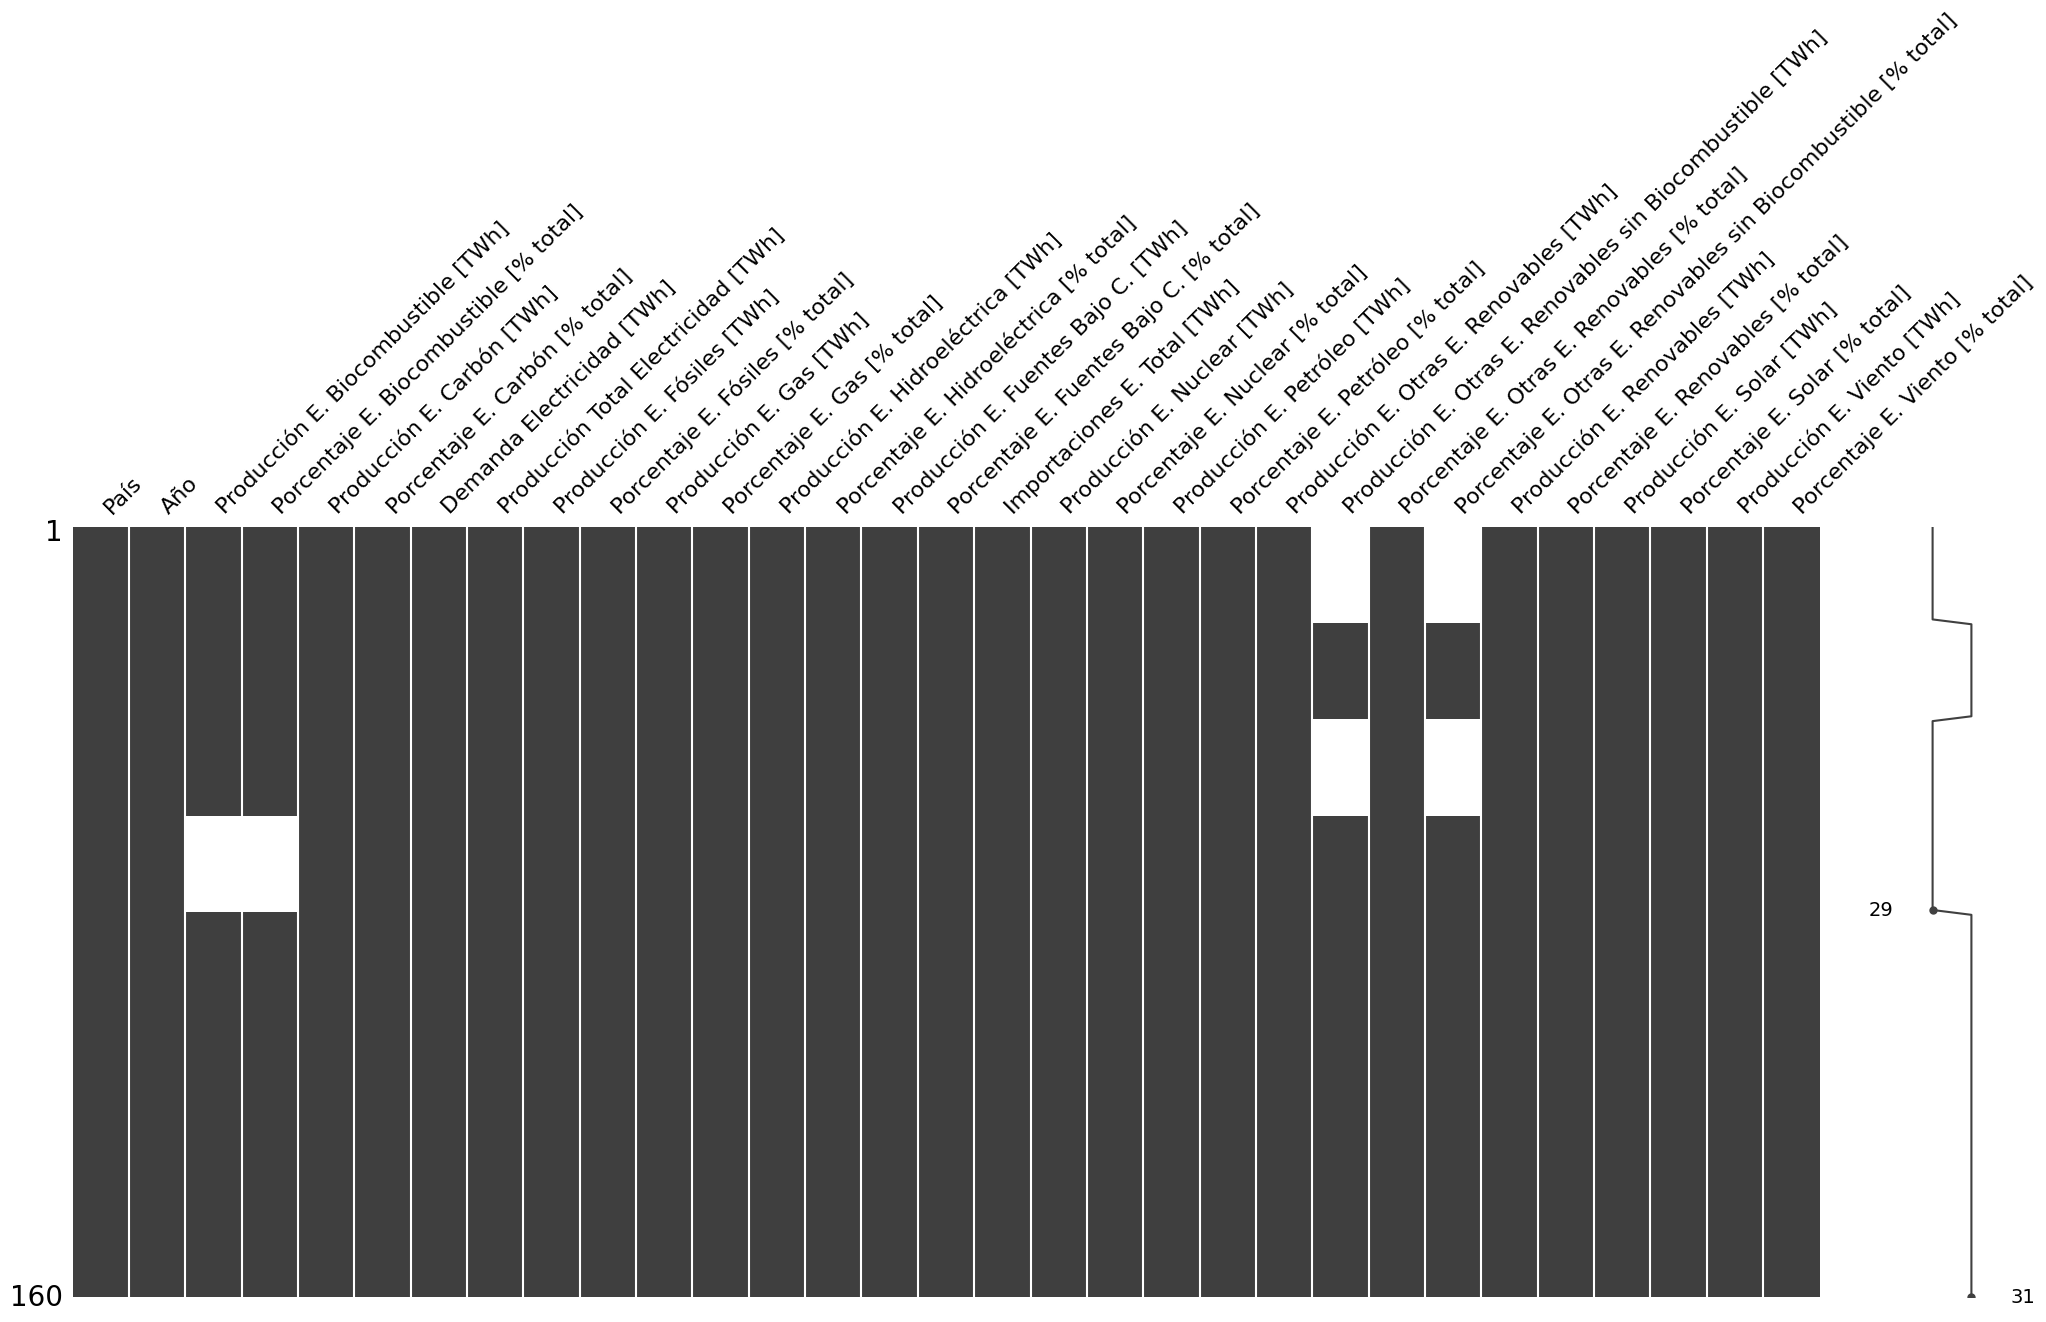

In [62]:
# Se analiza la calidad de los datos
msno.matrix(america_latina)

In [63]:
# La cantidad de datos nulos es menor comparado con la cantidad original.
america_latina.isnull().sum().sum()

120

In [64]:
# Se determina en que columnas se encuentran y en que cantidad.
america_latina.isnull().sum()

,0
País,0
Año,0
Producción E. Biocombustible [TWh],20
Porcentaje E. Biocombustible [% total],20
Producción E. Carbón [TWh],0
Porcentaje E. Carbón [% total],0
Demanda Electricidad [TWh],0
Producción Total Electricidad [TWh],0
Producción E. Fósiles [TWh],0
Porcentaje E. Fósiles [% total],0


Una forma de darse cuenta en donde están los datos nulos es agrupar por país y calcular su promedio. De esta manera, si los datos son nulos, el promedio dará NaN. Se analizan las dos primeras columnas ya que están relacionadas entre si.

In [65]:
america_latina[['País','Producción E. Biocombustible [TWh]','Porcentaje E. Biocombustible [% total]']].groupby(by='País').mean()

,Producción E. Biocombustible [TWh],Porcentaje E. Biocombustible [% total]
País,,
Argentina,1.4845,1.09450
Bolivia,0.1530,1.72125
Brazil,38.7250,6.73220
Chile,NaN,NaN
Ecuador,0.1955,0.66755
Paraguay,0.0710,0.13500
Peru,0.5840,1.37270
Uruguay,1.6380,12.46025


Respecto a la columna de Producción y Porcentaje de Electricidad por Biocombustibles, los NaN se encuentran en Chile. Se imprime ese país

In [66]:
nan_ch = america_latina.loc[america_latina['País']=='Chile']
chile_nan=nan_ch[['Producción E. Biocombustible [TWh]','Porcentaje E. Biocombustible [% total]']]
chile_nan

,Producción E. Biocombustible [TWh],Porcentaje E. Biocombustible [% total]
4362,NaN,NaN
4363,NaN,NaN
4364,NaN,NaN
4365,NaN,NaN
4366,NaN,NaN
4367,NaN,NaN
4368,NaN,NaN
4369,NaN,NaN
4370,NaN,NaN
4371,NaN,NaN


Tanto, la producción por biocombustibles y su porcentaje muestran NaN. Esto se debe a que en Chile, la producción de Biocombustibles todavía se encuentra en fase de investigación y prueba.

https://greennetwork.cl/medioambiente/biodiesel-que-paso-con-el-combustible-que-prometia-ser-el-futuro-en-chile/

https://ucsc.cl/medios-ucsc/blogs-academicos/potencial-y-desafios-para-biocombustibles-en-chile/

Debido a esto, se decide cambiar los NaN por 0

Finalmente, se analiza para la producción de electricidad por otras energías renovables sin biocombustibles.

In [67]:
america_latina[['País','Producción E. Otras E. Renovables sin Biocombustible [TWh]','Porcentaje E. Otras E. Renovables sin Biocombustible [% total]']].groupby(by='País').mean()

,Producción E. Otras E. Renovables sin Biocombustible [TWh],Porcentaje E. Otras E. Renovables sin Biocombustible [% total]
País,,
Argentina,NaN,NaN
Bolivia,0.0000,0.00000
Brazil,NaN,NaN
Chile,0.0965,0.11975
Ecuador,0.0000,0.00000
Paraguay,0.0000,0.00000
Peru,0.0000,0.00000
Uruguay,0.0000,0.00000


Se encuentran los datos nulos en Argentina y Brasil. Se analiza por país.

In [68]:
nan_ar = america_latina.loc[america_latina['País']=='Argentina']
argentina_nan=nan_ar[['Producción E. Otras E. Renovables sin Biocombustible [TWh]','Porcentaje E. Otras E. Renovables sin Biocombustible [% total]']]
argentina_nan

,Producción E. Otras E. Renovables sin Biocombustible [TWh],Porcentaje E. Otras E. Renovables sin Biocombustible [% total]
1116,NaN,NaN
1117,NaN,NaN
1118,NaN,NaN
1119,NaN,NaN
1120,NaN,NaN
1121,NaN,NaN
1122,NaN,NaN
1123,NaN,NaN
1124,NaN,NaN
1125,NaN,NaN


In [69]:
nan_br = america_latina.loc[america_latina['País']=='Brazil']
brasil_nan=nan_br[['Producción E. Otras E. Renovables sin Biocombustible [TWh]','Porcentaje E. Otras E. Renovables sin Biocombustible [% total]']]
brasil_nan

,Producción E. Otras E. Renovables sin Biocombustible [TWh],Porcentaje E. Otras E. Renovables sin Biocombustible [% total]
3041,NaN,NaN
3042,NaN,NaN
3043,NaN,NaN
3044,NaN,NaN
3045,NaN,NaN
3046,NaN,NaN
3047,NaN,NaN
3048,NaN,NaN
3049,NaN,NaN
3050,NaN,NaN


La columna de Producción de electricidad por otras energías renovables sin considerar el uso de biocombustibles se refiere a la generación de electricidad por geotermia y pequeños aprovechamientos hidroeléctricos. El aprovechamiento de la energía geotérmica en Argentina no está del todo desarrollada, es muy cara y no es una política de estado, resultando en un aporte ínfimo a la producción nacional.

https://tn.com.ar/sociedad/2023/11/06/geotermia-la-renovable-poco-explorada-que-puede-ser-clave-para-avanzar-con-la-transicion-energetica/

https://www.energiaestrategica.com/energia-a-partir-de-biomasa-perspectivas-y-problematicas-de-un-sector-que-promete-en-argentina/


En Brasil ocurre algo similar:

https://interelectricas.com.co/blog/en-brasil-la-energia-geotermica-puede-ser-alternativa-con-poco-impacto-ambiental-b5983.html


En general, la producción de electricidad por estas fuentes, están en etapas de estudio y prueba y son poco atractivas por su inversión inicial.

Se decide cambiar estos valores por 0

In [70]:
america_latina = america_latina.fillna(0)
america_latina

,País,Año,Producción E. Biocombustible [TWh],Porcentaje E. Biocombustible [% total],Producción E. Carbón [TWh],Porcentaje E. Carbón [% total],Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Producción E. Fósiles [TWh],Porcentaje E. Fósiles [% total],...,Producción E. Otras E. Renovables [TWh],Producción E. Otras E. Renovables sin Biocombustible [TWh],Porcentaje E. Otras E. Renovables [% total],Porcentaje E. Otras E. Renovables sin Biocombustible [% total],Producción E. Renovables [TWh],Porcentaje E. Renovables [% total],Producción E. Solar [TWh],Porcentaje E. Solar [% total],Producción E. Viento [TWh],Porcentaje E. Viento [% total]
1116,Argentina,2004,0.87,0.868,1.68,1.676,103.73,100.26,60.99,60.832,...,0.868,0.0,0.865,0.0,31.40,31.319,0.00,0.000,0.07,0.070
1117,Argentina,2005,0.92,0.870,2.18,2.061,109.63,105.75,63.67,60.208,...,0.916,0.0,0.867,0.0,35.21,33.296,0.00,0.000,0.07,0.066
1118,Argentina,2006,1.05,0.926,1.99,1.754,115.79,113.43,66.57,58.688,...,1.046,0.0,0.922,0.0,39.14,34.506,0.00,0.000,0.07,0.062
1119,Argentina,2007,1.07,0.943,2.34,2.061,121.12,113.52,73.92,65.116,...,1.071,0.0,0.943,0.0,32.35,28.497,0.00,0.000,0.06,0.053
1120,Argentina,2008,1.21,0.993,1.94,1.591,127.39,121.91,82.07,67.320,...,1.206,0.0,0.989,0.0,32.45,26.618,0.00,0.000,0.04,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20773,Uruguay,2019,2.51,15.619,0.00,0.000,13.06,16.07,0.28,1.742,...,2.510,0.0,15.619,0.0,15.79,98.258,0.42,2.614,4.75,29.558
20774,Uruguay,2020,2.73,20.118,0.00,0.000,12.94,13.57,0.81,5.969,...,2.730,0.0,20.118,0.0,12.76,94.031,0.46,3.390,5.48,40.383
20775,Uruguay,2021,2.79,17.448,0.00,0.000,13.20,15.99,2.46,15.385,...,2.790,0.0,17.448,0.0,13.53,84.615,0.48,3.002,4.99,31.207
20776,Uruguay,2022,2.84,18.709,0.00,0.000,13.08,15.18,1.37,9.025,...,2.840,0.0,18.709,0.0,13.81,90.975,0.50,3.294,4.78,31.489


In [71]:
america_latina.isnull().sum().sum()

0

<Axes: >

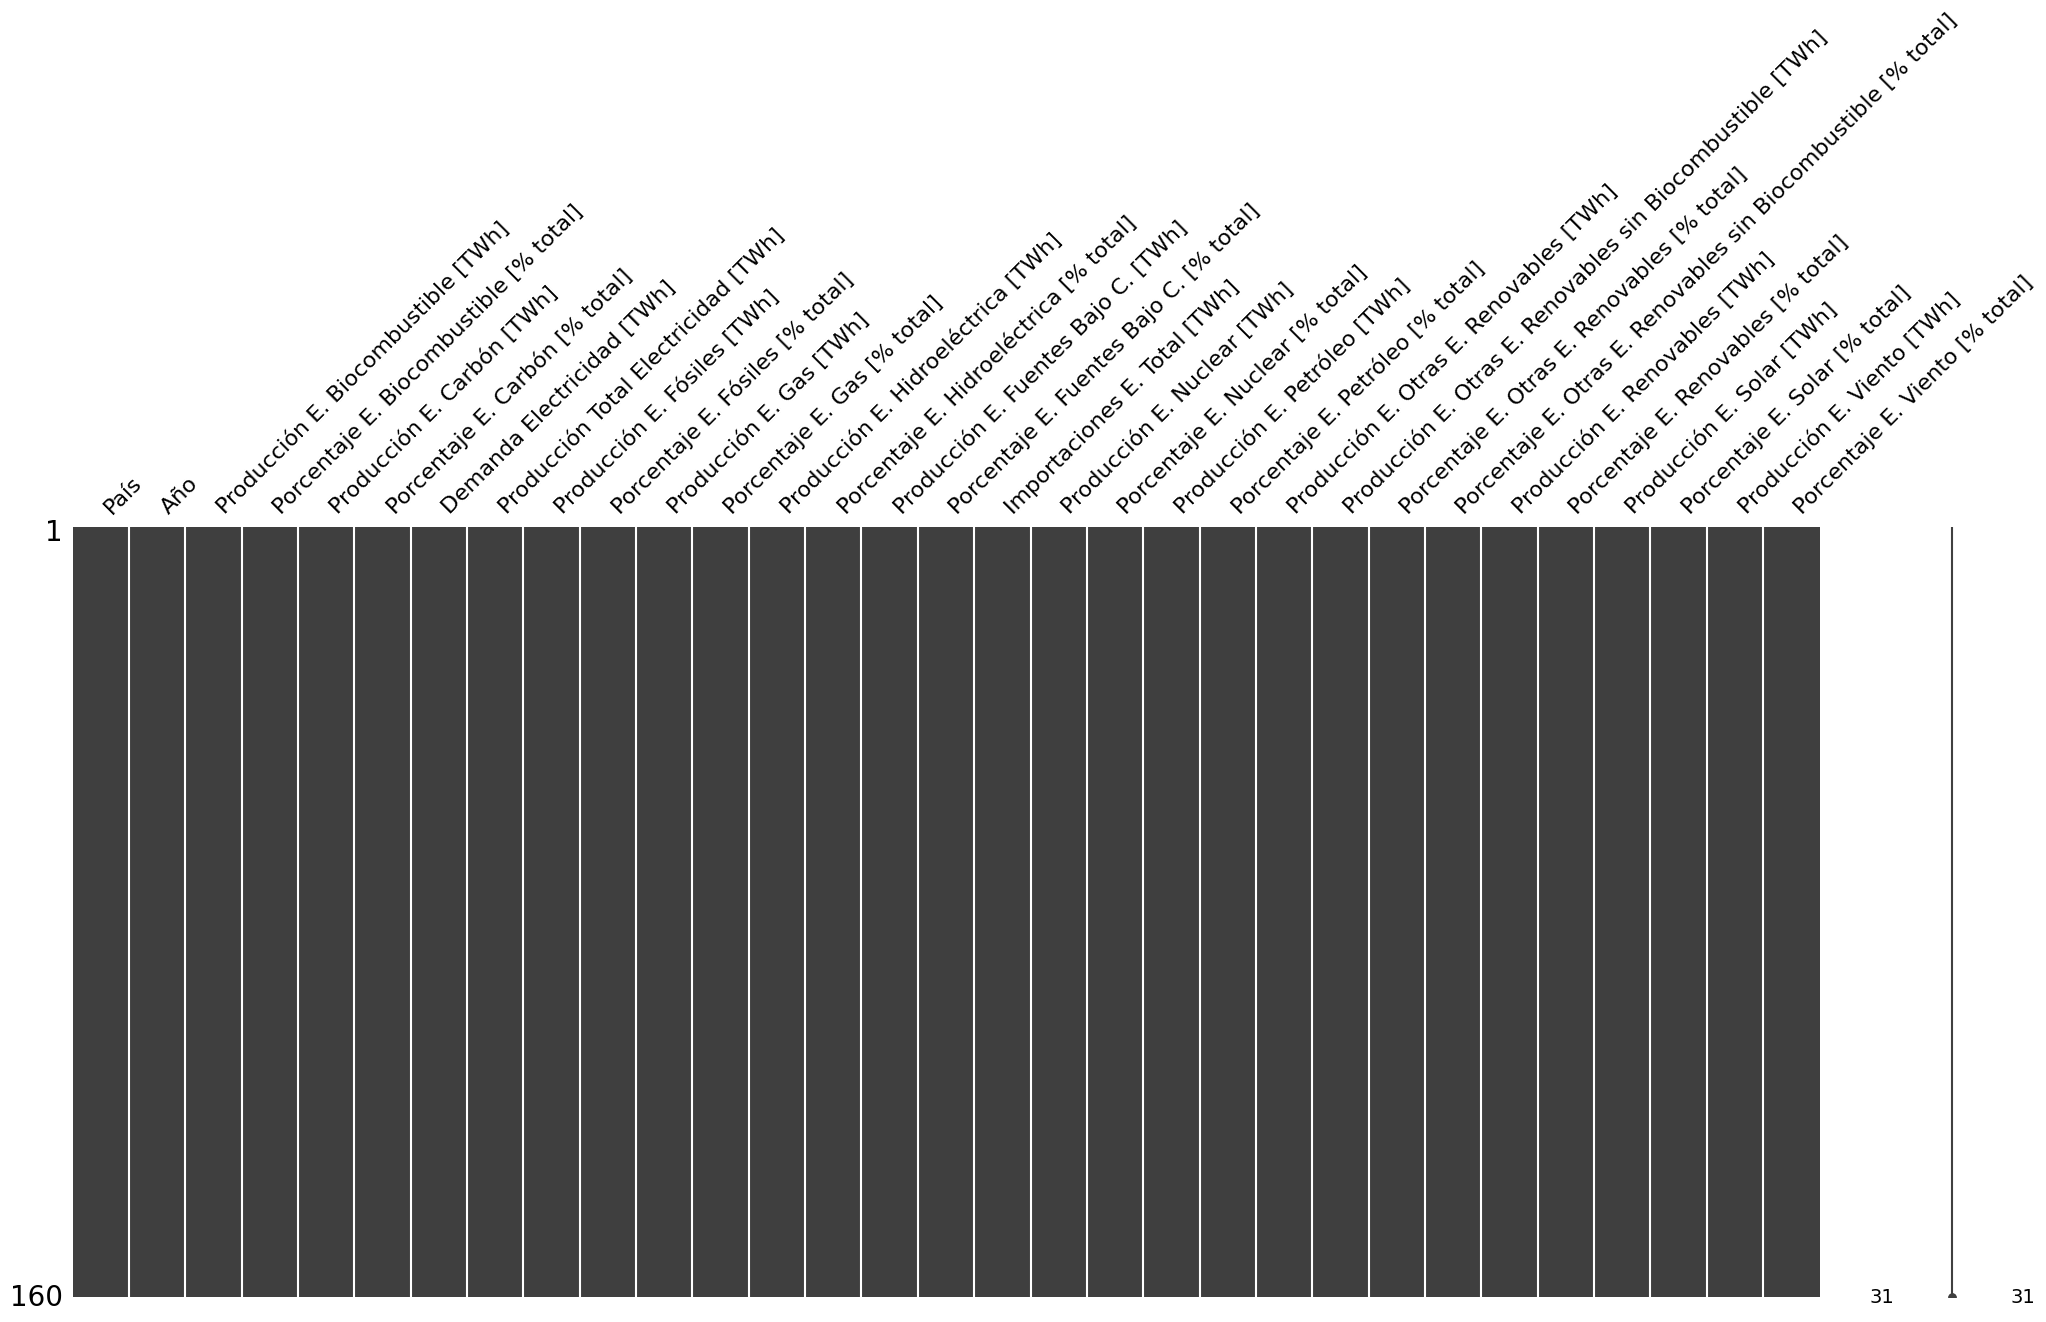

In [72]:
# Ya no quedan datos nulos
msno.matrix(america_latina)

In [73]:
america_latina.shape

(160, 31)

In [74]:
# Se guarda este dataset que también será subido al proyecto en Github
america_latina.to_csv('Electricidad América Latina (2004 - 2023).csv',index=False)

Este será el dataset que se va a utilizar para determinar en que país es conveniente invertir.

# Análisis América Latina

Lo primero que se quiere saber es cuanta electricidad produce, necesita e importa cada país, analizar sus datos estadísticos y graficarlos. Se crea un dataset de producción a partir del dataset de américa latina.

In [75]:
produccion = america_latina[['País','Año','Demanda Electricidad [TWh]','Producción Total Electricidad [TWh]','Importaciones E. Total [TWh]']]
produccion.head()

,País,Año,Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Importaciones E. Total [TWh]
1116,Argentina,2004,103.73,100.26,3.47
1117,Argentina,2005,109.63,105.75,3.88
1118,Argentina,2006,115.79,113.43,2.36
1119,Argentina,2007,121.12,113.52,7.60
1120,Argentina,2008,127.39,121.91,5.48


In [76]:
produccion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1116 to 20777
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   País                                 160 non-null    object 
 1   Año                                  160 non-null    int64  
 2   Demanda Electricidad [TWh]           160 non-null    float64
 3   Producción Total Electricidad [TWh]  160 non-null    float64
 4   Importaciones E. Total [TWh]         160 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.5+ KB


In [77]:
produccion.describe()

,Año,Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Importaciones E. Total [TWh]
count,160.000000,160.000000,160.000000,160.000000
mean,2013.500000,111.732000,111.546937,0.185063
std,5.784386,186.368788,173.822959,19.317686
min,2004.000000,4.530000,4.530000,-48.420000
25%,2008.750000,12.532500,15.037500,-0.072500
50%,2013.500000,30.345000,51.780000,0.000000
75%,2018.250000,88.640000,87.772500,2.395000
max,2023.000000,726.090000,713.180000,42.210000


Lo que puede verse en esta descripción de los datos, es que en general, el promedio de demanda supera el promedio de la producción. Por lo tanto, los países están necesitando más electricidad de lo que producen. Esto después de observará con mayor detalle.

Se crean variables para cada país y poder graficar. El gráfico elegido es de líneas, colocando los años en el eje x y combinando la producción, demanda e importación en el eje y.

In [78]:
# Se filtra para cada país el dataset de producción
argentina = produccion.loc[produccion['País']=='Argentina']
uruguay = produccion.loc[produccion['País']=='Uruguay']
brazil = produccion.loc[produccion['País']=='Brazil']
chile = produccion.loc[produccion['País']=='Chile']
paraguay = produccion.loc[produccion['País']=='Paraguay']
peru = produccion.loc[produccion['País']=='Peru']
bolivia = produccion.loc[produccion['País']=='Bolivia']
ecuador = produccion.loc[produccion['País']=='Ecuador']

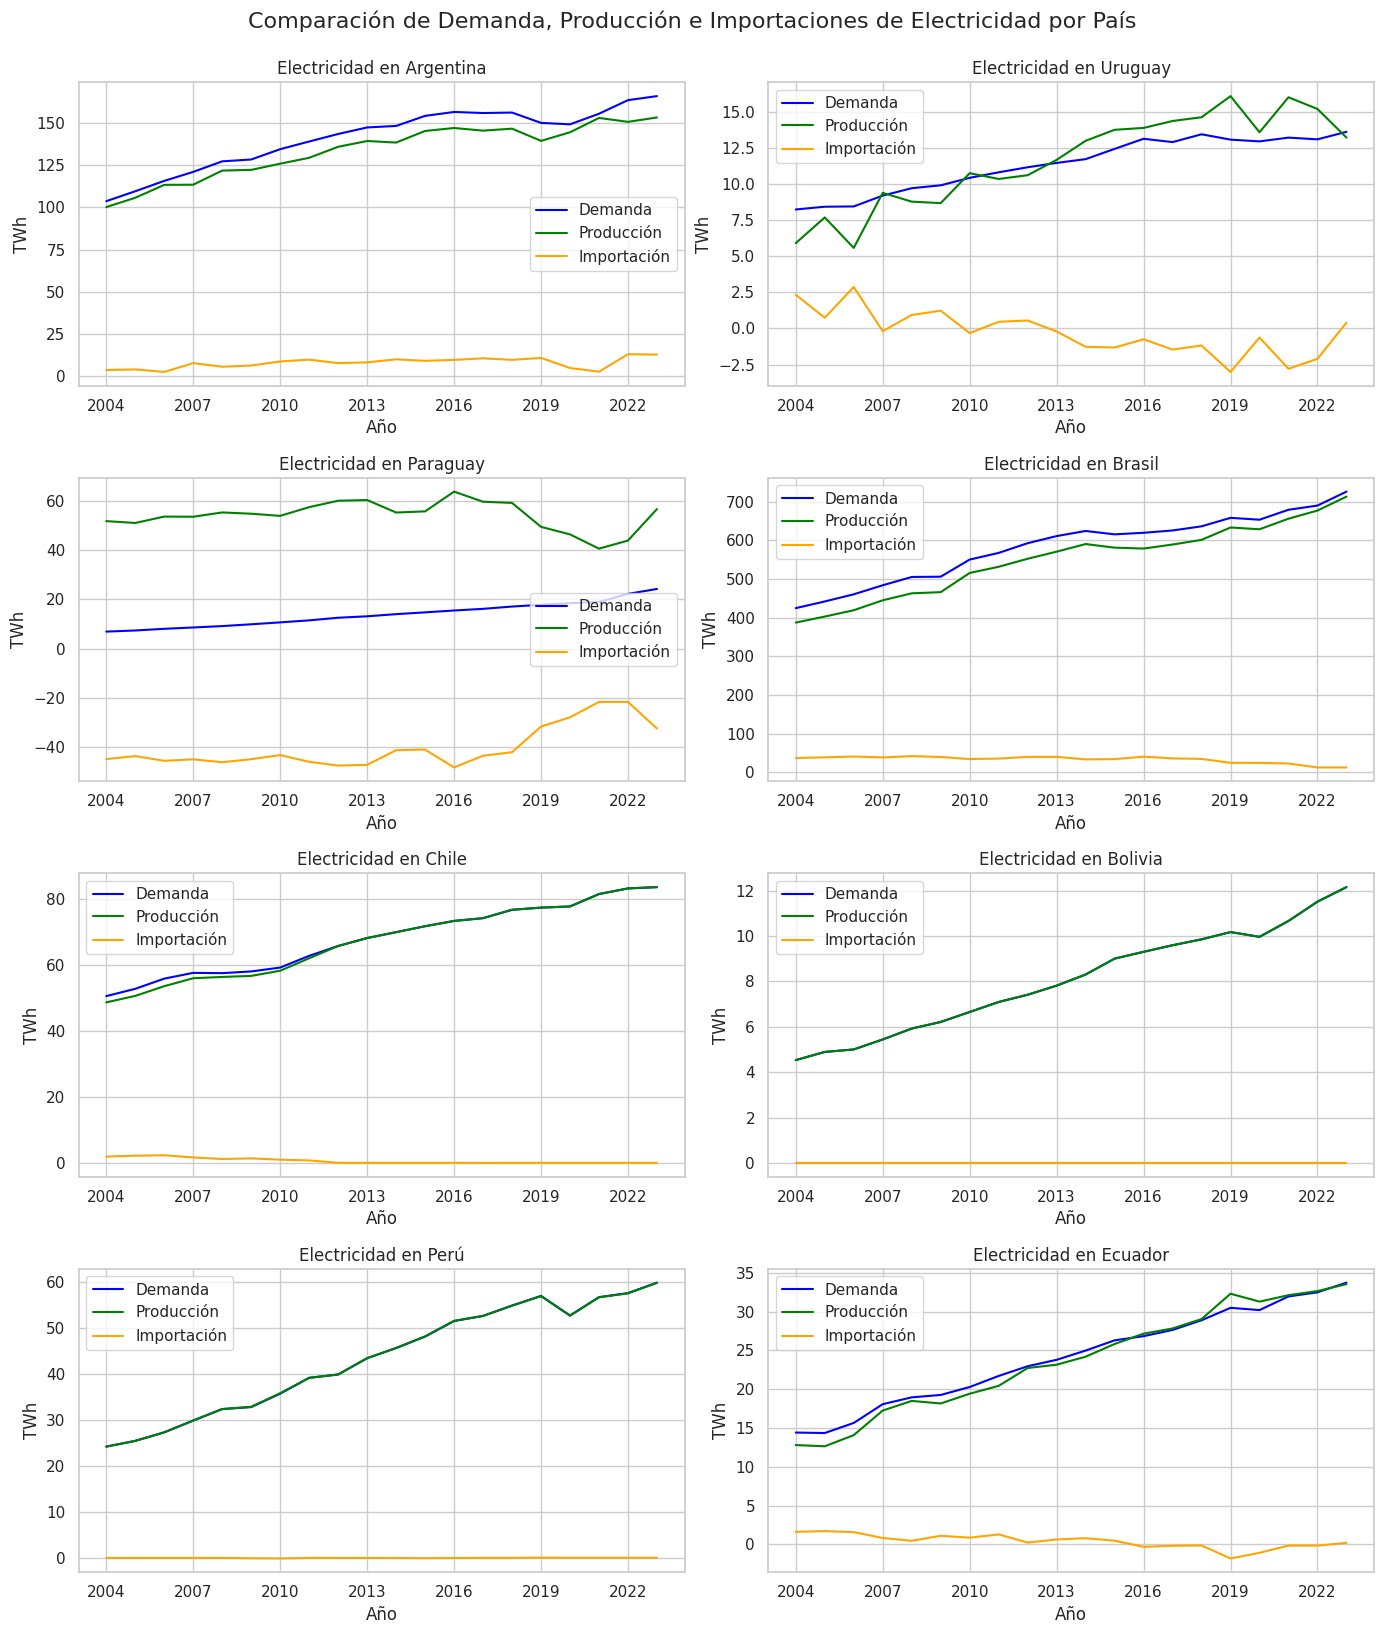

In [79]:
sns.set(style="whitegrid")
# Crear un lienzo con los 8 gráficos para comparar
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()
paises = [
    ('Argentina', argentina, ax1),
    ('Uruguay', uruguay, ax2),
    ('Paraguay', paraguay, ax3),
    ('Brasil', brazil, ax4),
    ('Chile', chile, ax5),
    ('Bolivia', bolivia, ax6),
    ('Perú', peru, ax7),
    ('Ecuador', ecuador, ax8)
]
for nombre, df, ax in paises:
    ax.plot(df['Año'], df['Demanda Electricidad [TWh]'], label='Demanda', color='blue')
    ax.plot(df['Año'], df['Producción Total Electricidad [TWh]'], label='Producción', color='green')
    ax.plot(df['Año'], df['Importaciones E. Total [TWh]'], label='Importación', color='orange')
    ax.set_title(f'Electricidad en {nombre}')
    ax.set_xlabel('Año')
    ax.set_ylabel('TWh')
    ax.legend()
    ax.grid(True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.suptitle('Comparación de Demanda, Producción e Importaciones de Electricidad por País', fontsize=16, y=1.02)
plt.show()

Que se observa por país:

- Argentina: En los últimos 20 años, la demanda de electricidad no alcanzó a cubrirse con la producción nacional y fue necesario importar electricidad. Lo que se genera es muy cercano a lo que se demanda y es interesante aportar electricidad por otras fuentes no explotadas para cubrir el faltante.

- Uruguay: Desde el 2004 al 2007 su generación de electricidad bajó y fue necesario importar electricidad. Desde el 2007 al 2013 hubo fluctuaciones positivas donde la producción de electricidad fue en aumento e igualando la demanda. A partir del 2014 la producción de electricidad supera la demanda, permitiendo la exportación de electricidad a otros países.

- Paraguay: Durante los 20 años de estudio, se generó más electricidad que lo que demandó el país. El restante de la energía ha sido exportado.

- Brasil: Es un caso similar al de Argentina. Genera menos de lo que demanda y es necesario importar electricidad para cubrirla. En los últimos dos años, se denota un repunte en la producción de electricidad, disminuyendo sus importaciones.

- Chile: Desde el 2004 al 2011, Chile necesitó importar electricidad debido a que no lograba cubrir la demanda. A partir del año 2012 la producción ha logrado igualar a la demanda. Tal vez, producen lo que necesitan.

- Bolivia: A lo largo del año 2004 al 2013 han generado electricidad a demanda. Es decir,producen lo que necesitan y no han importado energia eléctrica durante ese período.

- Perú: Es un caso similar a Bolivia. Producen lo que necesitan, no importan electricidad, pero tampoco exportan.

- Ecuador: Desde el 2004 al 2015, Ecuador, necesitó importar electricidad ya que lo que generaba no le alcanzaba para cubrir su demanda. En si, los valores son bajos y con el correr de los años lograron igualar la demanda y superar la producción de electricidad. Esto se ve desde el año 2013.

Con la información brindada y los gráficos obtenidos, se decide estudiar dos países que producen menos de lo que demandan, estos son: Argentina y Brasil.

# Análisis de los Países Seleccionados: Argentina y Brasil



## Análisis de Producción, Demanda e Importación de Electricidad para Argentina

Retomando los datos de producción de electricidad, demanda e importación, se vuelve a graficar para Argentina utilizando Plotly.

In [80]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=argentina['Año'], y=argentina['Demanda Electricidad [TWh]'], mode='lines', name='Demanda [TWh]'))
fig.add_trace(go.Scatter(x=argentina['Año'], y=argentina['Producción Total Electricidad [TWh]'], mode='lines', name='Producción [TWh)]'))
fig.add_trace(go.Scatter(x=argentina['Año'], y=argentina['Importaciones E. Total [TWh]'], mode='lines', name='Importaciones [TWh]'))
fig.update_layout(title='Demanda, Producción e Importación de Electricidad en Argentina (2004-2023)',
                  xaxis_title='Año',
                  yaxis_title='TWh',
                  height=600, width=1000
                  )
fig.show()

Este gráfico interactivo permite analizar por año que es lo que sucede con las 3 variables en estudio. Se observa una relación entre las 3 variables que indican que cuando la demanda de electricidad sube, sube la producción y las importaciones. Esto se debe a que Argentina posee una planta de producción que no siempre alcanza para satisfacer las demandas y es necesario importar electricidad.

### Análisis Estadístico Variables de Producción, Demanda e Importación

In [81]:
# Se realiza un describe
argentina.describe()

,Año,Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Importaciones E. Total [TWh]
count,20.00000,20.00000,20.000000,20.000000
mean,2013.50000,141.39800,133.663000,7.735000
std,5.91608,18.20085,16.175998,3.164036
min,2004.00000,103.73000,100.260000,2.360000
25%,2008.75000,128.20750,122.217500,5.287500
50%,2013.50000,147.95500,138.995000,8.330000
75%,2018.25000,155.75500,145.902500,9.717500
max,2023.00000,166.10000,153.430000,12.880000


Observando los resultados del describe:
- En los 20 años de estudio, en promedio, se demandó más electricidad de lo que se necesitó. El promedio de la importación es de 3.16 TWh.
- La diferencia entre los valores mínimos y máximos de producción es de 53,17 TWh, la de demanda es de 62,37 TWh y la de importación es igual a 10,52 TWh.
- La diferencia entre los promedios de producción y demanda es de -7.735 TWh, indicando que la producción de electricidad es menor a la demanda. Aquí se cumple lo solicitado en primer lugar.

Se realizan histogramas de cada variable:

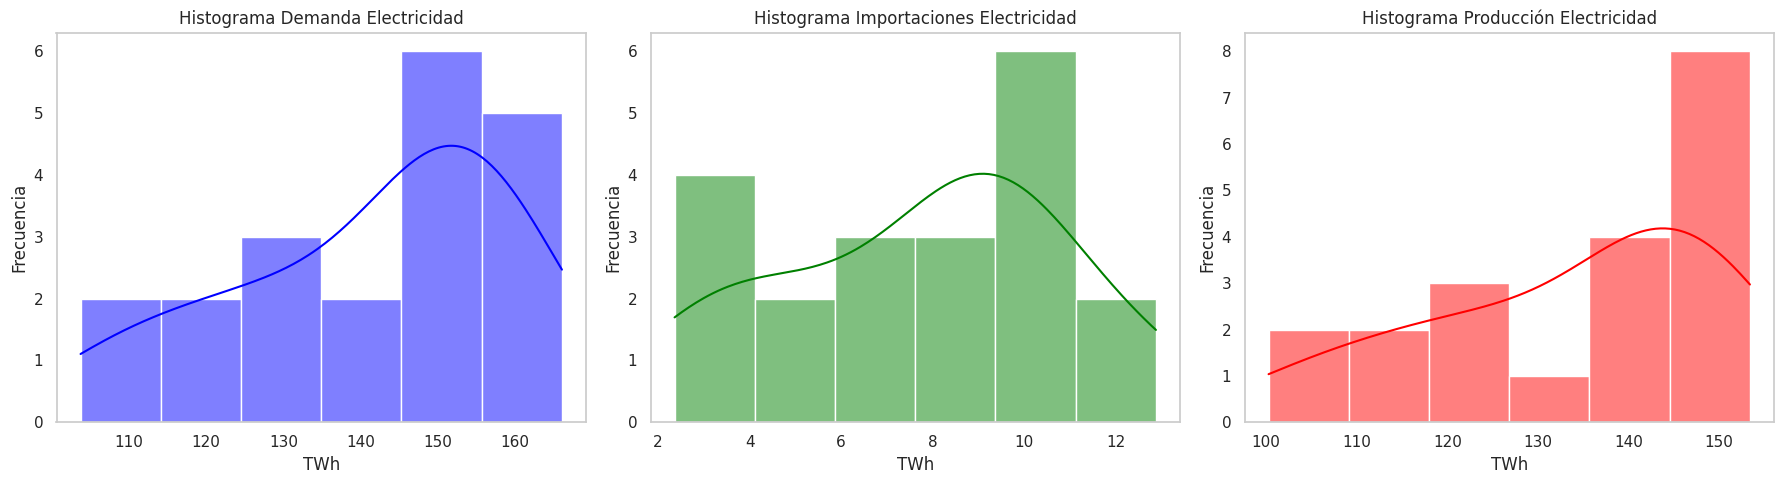

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# Demanda de Electricidad en Argentina
sns.histplot(argentina['Demanda Electricidad [TWh]'], kde=True, color='blue', ax=axs[0])
axs[0].set_title('Histograma Demanda Electricidad')
axs[0].set_xlabel('TWh')
axs[0].set_ylabel('Frecuencia')
axs[0].grid(False)
# Importación de Electricidad en Argentina
sns.histplot(argentina['Importaciones E. Total [TWh]'], kde=True, color='green', ax=axs[1])
axs[1].set_title('Histograma Importaciones Electricidad')
axs[1].set_xlabel('TWh')
axs[1].set_ylabel('Frecuencia')
axs[1].grid(False)
# Producción de Electricidad en Argentina
sns.histplot(argentina['Producción Total Electricidad [TWh]'], kde=True, color='red', ax=axs[2])
axs[2].set_title('Histograma Producción Electricidad')
axs[2].set_xlabel('TWh')
axs[2].set_ylabel('Frecuencia')
axs[2].grid(False)
plt.tight_layout()
plt.show()

In [83]:
# Se determina la curtosis
k_d = kurtosis(argentina['Demanda Electricidad [TWh]'])
k_i = kurtosis(argentina['Importaciones E. Total [TWh]'])
k_p = kurtosis(argentina['Producción Total Electricidad [TWh]'])
print ("Curtosis Demanda = ",k_d)
print ("Curtosis Importaciones = ",k_i)
print ("Curtosis Producción = ",k_p)

Curtosis Demanda =  -0.7009182957330053
Curtosis Importaciones =  -0.9342901610396672
Curtosis Producción =  -0.7932471201290787


Histograma Demanda:

- El Histograma de Demanda muestra una distribución asimétrica con sesgo negativo, indicando una mayor concentración de los datos en la zona derecha.
- La moda se encuentra en el rango de los 145-155 TWh, con una frecuencia de 6. La media es menor que la moda.
- La Curtosis nos indica que la distribución es platicúrtica (-0.7), es decir que existe una gran dispersión de los datos.
- No se observan outliers a simple vista pero deben ser analizados por la dispersión de los datos.

Histograma Importaciones:

- El Histograma de Importaciones también muestra una distribución asimétrica con sesgo negativo pero no tan marcado como el de Demanda.
- La moda se encuentra en el rango de los 9 a 11 TWh, con una frecuencia de 6. La media es menor que la moda.
- La Curtosis nos indica que la distribución es platicúrtica (-0.93), es decir que existe una gran dispersión de los datos.
- Tampoco se observan outliers pero deben ser analizados.

Histograma Producción:

- El Histograma de Producción muestra una distribución asimétrica con sesgo negativo.
- La moda se encuentra en el rango de los 145-155 TWh, con una frecuencia de 8. La media es menor que la moda.
- La Curtosis nos indica que la distribución es platicúrtica (-0.79), es decir que existe una gran dispersión de los datos.
- No se observan outliers a simple vista pero deben ser analizados por la dispersión de los datos.

Análisis de los datos por Boxplot: Este tipo de gráfico determina los valores de tendencia central y de dispersión de cada varible. Además, permite la observación de datos atípicos o outliers.

In [84]:
fig = px.box(argentina,
             y=argentina['Demanda Electricidad [TWh]'],
             title='Boxplot de Demanda (2004-2003)',
             points='all',
             template='plotly_white',
             color_discrete_sequence=['blue']
            )
fig.update_layout(
    yaxis_title='Demanda',
    xaxis_title='2004-2023',
    width=500,
    height=500
)
fig.show()

In [85]:
import plotly.express as px
import pandas as pd
fig = px.box(argentina,
             y=argentina['Producción Total Electricidad [TWh]'],
             title='Boxplot de Producción (2004-2003)',
             points='all',
             template='plotly_white',
             color_discrete_sequence=['red']
            )
fig.update_layout(
    yaxis_title='Producción',
    xaxis_title='2004-2023',
    width=500,
    height=500
)
fig.show()

In [86]:
import plotly.express as px
import pandas as pd
fig = px.box(argentina,
             y=argentina['Importaciones E. Total [TWh]'],
             title='Boxplot de Importaciones (2004-2003)',
             points='all',
             template='plotly_white',
             color_discrete_sequence=['green']
            )
fig.update_layout(
    yaxis_title='Importación',
    xaxis_title='2004-2023',
    width=500,
    height=500
)
fig.show()

En ninguno de los 3 casos de observan outliers, indicando que los datos son consistentes y que el procesamiento de los datos fue realizado correctamente.

#### Búsqueda de correlación entre Demanda, Producción e Importación.



En esta parte se intentará determinar si existe algún tipo de correlación entre las variables. De existir una correlación se debe determinar si son causales o no. Para ello, se crea una matriz de correlación:

In [87]:
correlacionar_arg = argentina.drop(columns=['País','Año'])
correlacionar_arg.head()

,Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Importaciones E. Total [TWh]
1116,103.73,100.26,3.47
1117,109.63,105.75,3.88
1118,115.79,113.43,2.36
1119,121.12,113.52,7.60
1120,127.39,121.91,5.48


                                     Demanda Electricidad [TWh]  \
Demanda Electricidad [TWh]                             1.000000   
Producción Total Electricidad [TWh]                    0.989961   
Importaciones E. Total [TWh]                           0.691281   

                                     Producción Total Electricidad [TWh]  \
Demanda Electricidad [TWh]                                      0.989961   
Producción Total Electricidad [TWh]                             1.000000   
Importaciones E. Total [TWh]                                    0.582212   

                                     Importaciones E. Total [TWh]  
Demanda Electricidad [TWh]                               0.691281  
Producción Total Electricidad [TWh]                      0.582212  
Importaciones E. Total [TWh]                             1.000000  


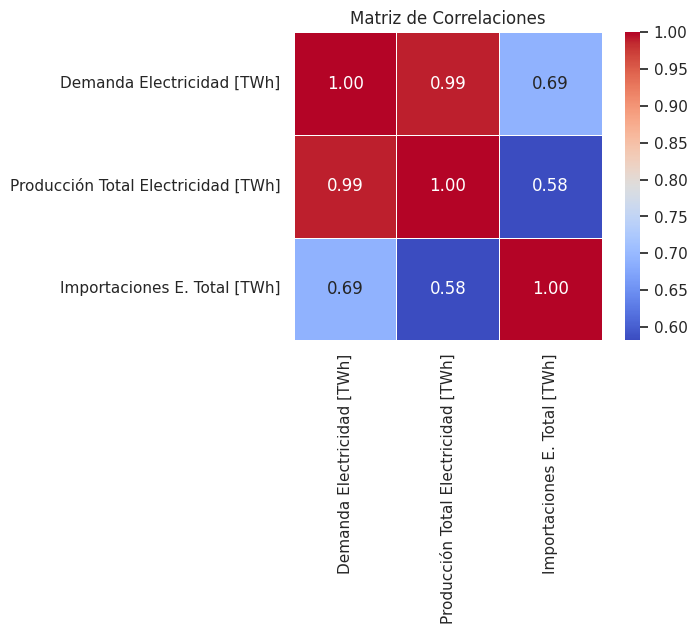

In [88]:
correlation_matrix = correlacionar_arg.corr()
print(correlation_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
plt.title('Matriz de Correlaciones')
plt.show()

La matriz muestra una fuerte correlación entre la demanda y la generación de electricidad. Se grafican

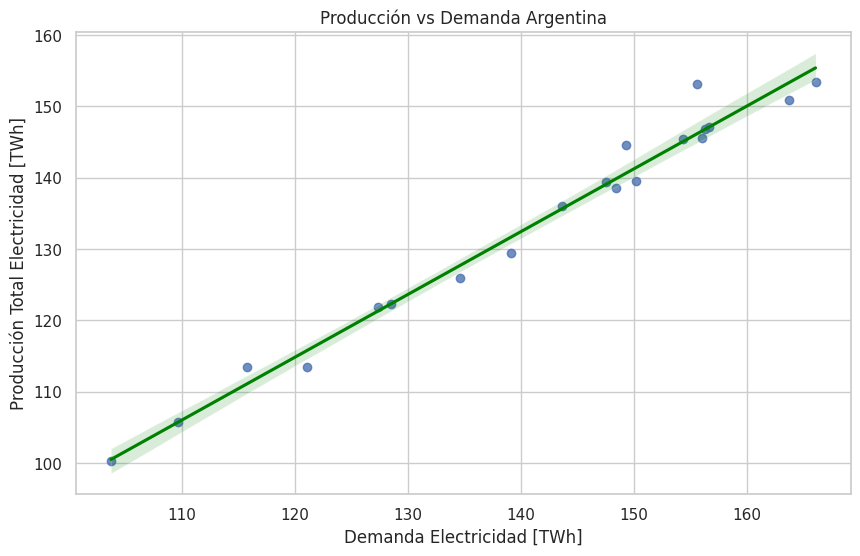

In [89]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='Demanda Electricidad [TWh]', y='Producción Total Electricidad [TWh]', data=argentina, line_kws={'color': 'green'})
ax.set_title('Producción vs Demanda Argentina')
ax.set_xlabel('Demanda Electricidad [TWh]')
ax.set_ylabel('Producción Total Electricidad [TWh]')
plt.show()

In [90]:
X = argentina['Demanda Electricidad [TWh]'].values.reshape(-1, 1)
y = argentina['Producción Total Electricidad [TWh]'].values
model = LinearRegression()
model.fit(X, y)
pendiente = model.coef_[0]
ordenada = model.intercept_
# Calculamos R^2
r2 = model.score(X, y)
# Formatear la ecuación de la regresión y el R^2
ecuacion = f"f(x)={pendiente:.2f}*x {ordenada:.2f}"
r2 = f"{r2:.2f}"

# Imprimir resultados
print ("La expresión matemática de la regresión lineal es",ecuacion, "y su parámetro R^2 es",r2)

La expresión matemática de la regresión lineal es f(x)=0.88*x 9.26 y su parámetro R^2 es 0.98


La ecuación y el gráfico muestran una tendencia positiva. Es decir, que a medida que aumenta la demanda, aumenta la producción. El coeficiente R^2 muestra un ajuste muy bueno cercano al 1.

Sin embargo, no puede asegurarse si existe causalidad. La producción de electricidad puede aumentar en respuesta a un aumento de la demanda, pero no significa que un cambio en la producción cause un cambio en la demanda.

Argentina posee una planta instalada de 43.405 MW al 2023. Esto significa que es la máxima capacidad de energía eléctrica que el país puede producir. Por lo tanto, si se produce lo que se demanda, pero no alcanza y se tiene que importar.

El país busca por diferentes medios y programas mejorar la capacidad de producción y distribución de energía eléctrica pero hasta el día de hoy no se ha logrado alcanzar los objetivos.

Se concluye que la correlación realiza es correcta, ya que se genera electricidad por demanda.

Con este análisis de producción, demanda e importación se determina que es interesante insertarse en el mercado eléctrico argentino y aportar como mínimo lo que el país no logra cubrir. Lo que mínimamente se requiere es generar 13 KWh de electricidad (valor de los últimos dos años 12,88 y 12,67).


Notas de interés:

https://www.infobae.com/economia/2022/01/14/por-el-record-de-demanda-argentina-tuvo-que-importar-energia-electrica-de-brasil/

https://www.perfil.com/noticias/opinion/argentina-con-capacidad-productiva-pero-sin-energia.phtml

https://es.wikipedia.org/wiki/Historia_del_sector_el%C3%A9ctrico_en_Argentina



### Producción de Electricidad por distintas fuentes en Argentina (2004-2013)

Retomando el dataset de América Latina, se crea un nuevo dataset que incluye a Argentina y la generación de electricidad por diferentes fuentes.

In [91]:
# Dataset electricidad argentina
electricidad_argentina = america_latina.loc[america_latina['País']=='Argentina']
electricidad_argentina.head()

,País,Año,Producción E. Biocombustible [TWh],Porcentaje E. Biocombustible [% total],Producción E. Carbón [TWh],Porcentaje E. Carbón [% total],Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Producción E. Fósiles [TWh],Porcentaje E. Fósiles [% total],...,Producción E. Otras E. Renovables [TWh],Producción E. Otras E. Renovables sin Biocombustible [TWh],Porcentaje E. Otras E. Renovables [% total],Porcentaje E. Otras E. Renovables sin Biocombustible [% total],Producción E. Renovables [TWh],Porcentaje E. Renovables [% total],Producción E. Solar [TWh],Porcentaje E. Solar [% total],Producción E. Viento [TWh],Porcentaje E. Viento [% total]
1116,Argentina,2004,0.87,0.868,1.68,1.676,103.73,100.26,60.99,60.832,...,0.868,0.0,0.865,0.0,31.40,31.319,0.0,0.0,0.07,0.070
1117,Argentina,2005,0.92,0.870,2.18,2.061,109.63,105.75,63.67,60.208,...,0.916,0.0,0.867,0.0,35.21,33.296,0.0,0.0,0.07,0.066
1118,Argentina,2006,1.05,0.926,1.99,1.754,115.79,113.43,66.57,58.688,...,1.046,0.0,0.922,0.0,39.14,34.506,0.0,0.0,0.07,0.062
1119,Argentina,2007,1.07,0.943,2.34,2.061,121.12,113.52,73.92,65.116,...,1.071,0.0,0.943,0.0,32.35,28.497,0.0,0.0,0.06,0.053
1120,Argentina,2008,1.21,0.993,1.94,1.591,127.39,121.91,82.07,67.320,...,1.206,0.0,0.989,0.0,32.45,26.618,0.0,0.0,0.04,0.033


In [92]:
electricidad_argentina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1116 to 1135
Data columns (total 31 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   País                                                            20 non-null     object 
 1   Año                                                             20 non-null     int64  
 2   Producción E. Biocombustible [TWh]                              20 non-null     float64
 3   Porcentaje E. Biocombustible [% total]                          20 non-null     float64
 4   Producción E. Carbón [TWh]                                      20 non-null     float64
 5   Porcentaje E. Carbón [% total]                                  20 non-null     float64
 6   Demanda Electricidad [TWh]                                      20 non-null     float64
 7   Producción Total Electricidad [TWh]                    

Realizando una mirada visual del dataset, se encuentra que algunas de las columnas de producción de electricidad son la suma de otras de las columnas. Por ejemplo, la columna de Producción de electricidad por energías renovables resulta ser la suma de la producción de energía hidroeléctrica, biocombustibles, eólica y solar.

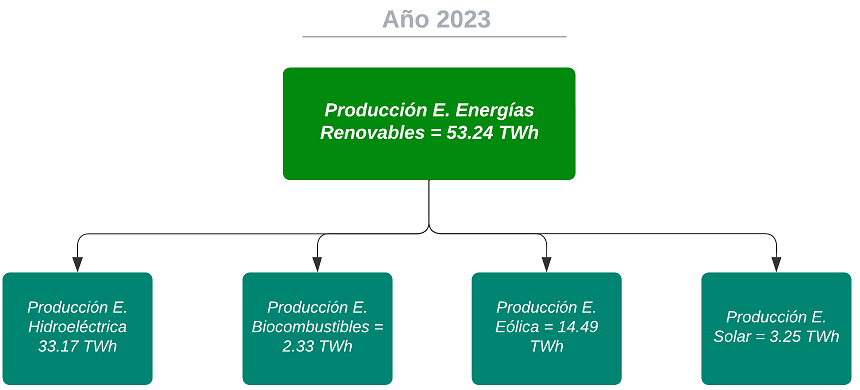

In [93]:
# Se realiza la suma de estas columnas y se compara con el total de E. Renovables.
renovables_argentina = electricidad_argentina[['Año','Producción E. Renovables [TWh]','Producción E. Biocombustible [TWh]','Producción E. Hidroeléctrica [TWh]','Producción E. Solar [TWh]','Producción E. Viento [TWh]']]
renovables_argentina = renovables_argentina.set_index('Año')
renovables_argentina['Suma E. Renovables [TWh]']= renovables_argentina[['Producción E. Biocombustible [TWh]','Producción E. Hidroeléctrica [TWh]','Producción E. Solar [TWh]','Producción E. Viento [TWh]']].sum(axis=1)
renovables_argentina.head()

,Producción E. Renovables [TWh],Producción E. Biocombustible [TWh],Producción E. Hidroeléctrica [TWh],Producción E. Solar [TWh],Producción E. Viento [TWh],Suma E. Renovables [TWh]
Año,,,,,,
2004,31.40,0.87,30.46,0.0,0.07,31.40
2005,35.21,0.92,34.22,0.0,0.07,35.21
2006,39.14,1.05,38.02,0.0,0.07,39.14
2007,32.35,1.07,31.22,0.0,0.06,32.35
2008,32.45,1.21,31.20,0.0,0.04,32.45


La suma de de estas 4 fuentes de generación da como resultado la columna de Producción E. Renovables [TWh]. Por lo tanto NO se coloca esta columna para el nuevo dataset.

Lo mismo ocurre con Producción E. Fuentes Bajo Carbono [TWh] que incluye a la Hidroeléctrica, Eólica, Solar, Biocombustibles y Nuclear.

In [94]:
bajoc_argentina = electricidad_argentina[['Año','Producción E. Fuentes Bajo C. [TWh]','Producción E. Biocombustible [TWh]','Producción E. Hidroeléctrica [TWh]','Producción E. Solar [TWh]','Producción E. Viento [TWh]','Producción E. Nuclear [TWh]']]
bajoc_argentina = bajoc_argentina.set_index('Año')
bajoc_argentina['Suma E. Bajo Carbono [TWh]']= bajoc_argentina[['Producción E. Biocombustible [TWh]','Producción E. Hidroeléctrica [TWh]','Producción E. Solar [TWh]','Producción E. Viento [TWh]','Producción E. Nuclear [TWh]']].sum(axis=1)
bajoc_argentina.head()

,Producción E. Fuentes Bajo C. [TWh],Producción E. Biocombustible [TWh],Producción E. Hidroeléctrica [TWh],Producción E. Solar [TWh],Producción E. Viento [TWh],Producción E. Nuclear [TWh],Suma E. Bajo Carbono [TWh]
Año,,,,,,,
2004,39.27,0.87,30.46,0.0,0.07,7.87,39.27
2005,42.08,0.92,34.22,0.0,0.07,6.87,42.08
2006,46.86,1.05,38.02,0.0,0.07,7.72,46.86
2007,39.60,1.07,31.22,0.0,0.06,7.25,39.60
2008,39.84,1.21,31.20,0.0,0.04,7.39,39.84


In [95]:
x = bajoc_argentina.index

In [96]:
# Se grafica en plotly para apilar las columnas
fig = go.Figure()
#colors = ['violet','skyblue','gold','darkgreen','maroon']
colors = ['#F4A460', '#1E90FF', '#FFD700', '#5F9EA0', '#A52A2A']
#colors = ['#003366', '#336699', '#66B2FF', '#99CCFF', '#CCEEFF']
#colors = ['#4B5320', '#556B2F', '#8B4513', '#A0522D', '#2E8B57']
#colors = ['#1B263B', '#415A77', '#778DA9', '#E0E1DD', '#F4A261']


fig.add_trace(go.Bar(x=x, y=bajoc_argentina['Producción E. Biocombustible [TWh]'], name='Biocombustibles',marker_color=colors[4]))
fig.add_trace(go.Bar(x=x, y=bajoc_argentina['Producción E. Hidroeléctrica [TWh]'], name='Hidroeléctrica',
                     base=bajoc_argentina['Producción E. Biocombustible [TWh]'],marker_color=colors[1],))
fig.add_trace(go.Bar(x=x, y=bajoc_argentina['Producción E. Solar [TWh]'], name='Solar',
                     base=bajoc_argentina['Producción E. Biocombustible [TWh]'] + bajoc_argentina['Producción E. Hidroeléctrica [TWh]'],marker_color=colors[2]))
fig.add_trace(go.Bar(x=x, y=bajoc_argentina['Producción E. Viento [TWh]'], name='Viento',
                     base=bajoc_argentina['Producción E. Biocombustible [TWh]'] + bajoc_argentina['Producción E. Hidroeléctrica [TWh]'] + bajoc_argentina['Producción E. Solar [TWh]'],marker_color=colors[3]))
fig.add_trace(go.Bar(x=x, y=bajoc_argentina['Producción E. Nuclear [TWh]'], name='Nuclear',
                     base=bajoc_argentina['Producción E. Fuentes Bajo C. [TWh]'] - bajoc_argentina['Producción E. Nuclear [TWh]'],marker_color=colors[0]))
# Añadir la línea para de Produccción E. Bajo Carbono
fig.add_trace(go.Scatter(x=x, y=bajoc_argentina['Producción E. Fuentes Bajo C. [TWh]'], mode='lines+markers',
                         name='Producción E. Fuentes Bajo C', line=dict(color='dimgray', width=2)))
fig.update_layout(title='Suma de Fuentes de Generación de Electricidad de Bajo Carbono',
                  xaxis_title='Año',
                  yaxis_title='TWh',
                  barmode='stack',
                  template='plotly_white')
fig.show()

Por lo tanto, se elimina la columna de Producción E. Fuentes Bajo C. [TWh].

Finalmente, la columna de Producción de Electricidad con Combustibles Fósiles incluye a la Producción por Carbón, Gas y Petróleo.


In [97]:
fosil_argentina = electricidad_argentina[['Año','Producción E. Fósiles [TWh]','Producción E. Carbón [TWh]','Producción E. Gas [TWh]','Producción E. Petróleo [TWh]']]
fosil_argentina = fosil_argentina.set_index('Año')
fosil_argentina['Suma E. Fósiles [TWh]']= fosil_argentina[['Producción E. Carbón [TWh]','Producción E. Gas [TWh]','Producción E. Petróleo [TWh]']].sum(axis=1)
fosil_argentina.head()

,Producción E. Fósiles [TWh],Producción E. Carbón [TWh],Producción E. Gas [TWh],Producción E. Petróleo [TWh],Suma E. Fósiles [TWh]
Año,,,,,
2004,60.99,1.68,55.21,4.10,60.99
2005,63.67,2.18,55.70,5.79,63.67
2006,66.57,1.99,56.40,8.18,66.57
2007,73.92,2.34,60.18,11.40,73.92
2008,82.07,1.94,65.41,14.72,82.07


La columna de Producción de Electricidad por Fósiles también se elimina.

El dataset final nos queda con las siguientes fuentes de generación de electricidad:

1 - Producción E. Biocombustible [TWh]

2 - Producción E. Carbón [TWh]

3 - Producción E. Gas [TWh]

4 - Producción E. Hidroeléctrica [TWh]

5 - Producción E. Nuclear [TWh]

6 - Producción E. Petróleo [TWh]

7 - Producción E. Solar [TWh]

8 - Producción E. Viento [TWh]

In [168]:
# Dataset de producción por tipo
produccion_tipo_arg = electricidad_argentina[['Año','Producción E. Biocombustible [TWh]','Producción E. Carbón [TWh]','Producción E. Gas [TWh]','Producción E. Hidroeléctrica [TWh]','Producción E. Nuclear [TWh]','Producción E. Petróleo [TWh]','Producción E. Solar [TWh]','Producción E. Viento [TWh]']]
produccion_tipo_arg.head()

,Año,Producción E. Biocombustible [TWh],Producción E. Carbón [TWh],Producción E. Gas [TWh],Producción E. Hidroeléctrica [TWh],Producción E. Nuclear [TWh],Producción E. Petróleo [TWh],Producción E. Solar [TWh],Producción E. Viento [TWh]
1116,2004,0.87,1.68,55.21,30.46,7.87,4.10,0.0,0.07
1117,2005,0.92,2.18,55.70,34.22,6.87,5.79,0.0,0.07
1118,2006,1.05,1.99,56.40,38.02,7.72,8.18,0.0,0.07
1119,2007,1.07,2.34,60.18,31.22,7.25,11.40,0.0,0.06
1120,2008,1.21,1.94,65.41,31.20,7.39,14.72,0.0,0.04


In [99]:
produccion_tipo_arg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1116 to 1135
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Año                                 20 non-null     int64  
 1   Producción E. Biocombustible [TWh]  20 non-null     float64
 2   Producción E. Carbón [TWh]          20 non-null     float64
 3   Producción E. Gas [TWh]             20 non-null     float64
 4   Producción E. Hidroeléctrica [TWh]  20 non-null     float64
 5   Producción E. Nuclear [TWh]         20 non-null     float64
 6   Producción E. Petróleo [TWh]        20 non-null     float64
 7   Producción E. Solar [TWh]           20 non-null     float64
 8   Producción E. Viento [TWh]          20 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 1.6 KB


Ahora, se analizan los datos de este dataset para encontrar outliers y ver su distribucion

In [200]:
# Se crea un nuevo dataset eliminando la columna de Año
box_arg = produccion_tipo_arg.drop(columns='Año')
box_arg.head()

,Producción E. Biocombustible [TWh],Producción E. Carbón [TWh],Producción E. Gas [TWh],Producción E. Hidroeléctrica [TWh],Producción E. Nuclear [TWh],Producción E. Petróleo [TWh],Producción E. Solar [TWh],Producción E. Viento [TWh]
1116,0.87,1.68,55.21,30.46,7.87,4.10,0.0,0.07
1117,0.92,2.18,55.70,34.22,6.87,5.79,0.0,0.07
1118,1.05,1.99,56.40,38.02,7.72,8.18,0.0,0.07
1119,1.07,2.34,60.18,31.22,7.25,11.40,0.0,0.06
1120,1.21,1.94,65.41,31.20,7.39,14.72,0.0,0.04


Se grafican sus distribuciones

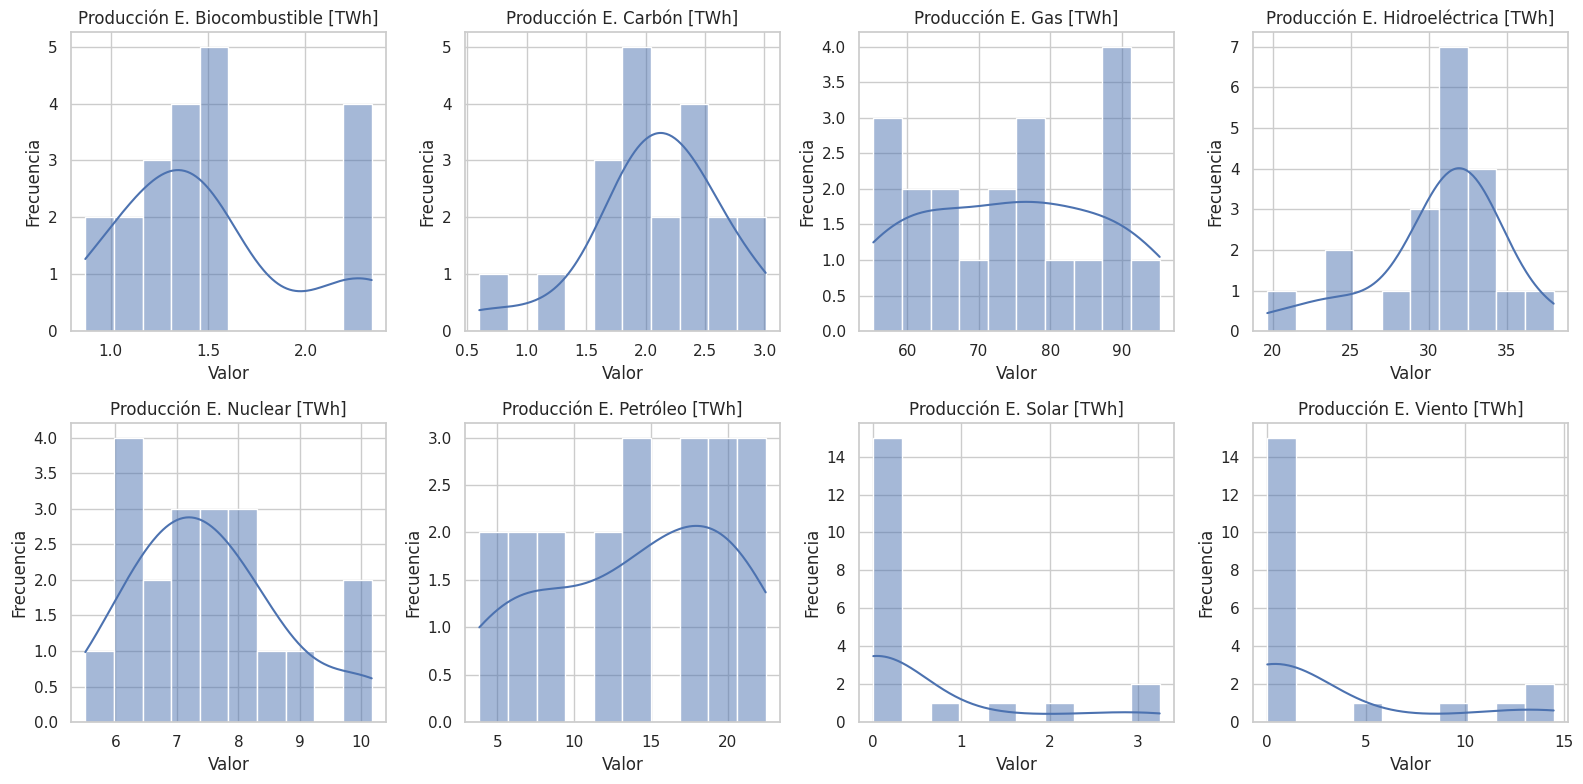

In [201]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, col in enumerate(box_arg.columns):
    row = i // 4
    col_index = i % 4
    sns.histplot(box_arg[col], ax=axes[row, col_index], bins=10, kde=True)
    axes[row, col_index].set_title(col)
    axes[row, col_index].set_xlabel("Valor")
    axes[row, col_index].set_ylabel("Frecuencia")

# Ajustar el layout
plt.tight_layout()
plt.show()


Las distribuciones observadas son asimétricas y se observan outliers a simple vista, salvo en la de Producción por Gas.

Asimétrica con sesgo positivo: Biocombustible, Nuclear, Solar y Viento.

Asimétrica con sesgo negativo: Carbón, Hidroeléctrica y Petróleo.

La de gas se trata de asemejar a una distribución normal pero dada la dispersion de sus datos, alejados de la media, se trata de una distribución con curtosis platicúrtica.

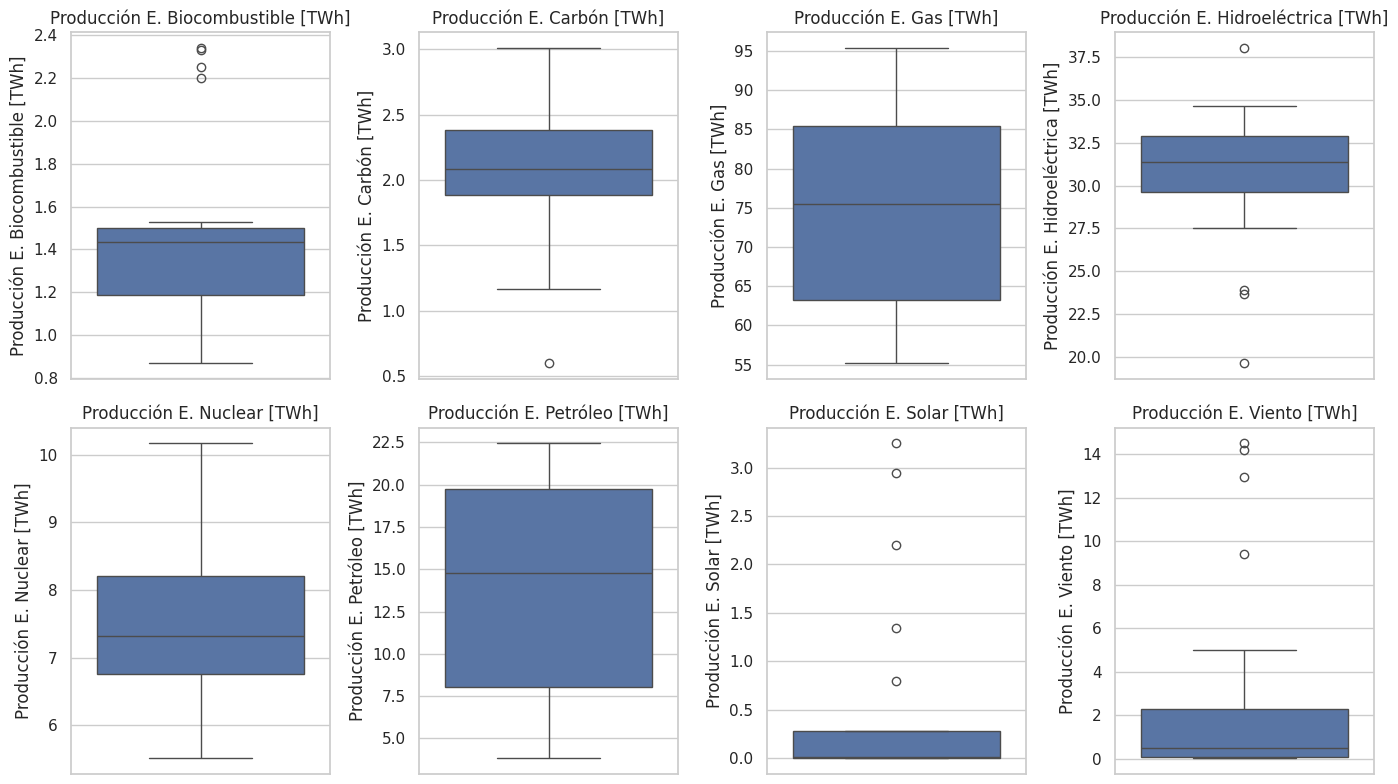

In [202]:
# Se analizan los outliers
fig, axes = plt.subplots(2, 4, figsize=(14, 8))
for i, col in enumerate(box_arg.columns):
    row = i // 4
    col_index = i % 4
    sns.boxplot(y=box_arg[col], ax=axes[row, col_index])
    axes[row, col_index].set_title(col)
plt.tight_layout()
plt.show()


Se encuentran datos anómalos en varias de las columnas, la mayor concentración se registra en las nuevas fuentes de energía, todas de ellas, renovables.

El aporte al mercado nacional de estas fuentes no surge hasta comenzada la primera década del 2000. Por lo tanto, no sería una buena idea eliminar estos valores que son muy bajos, inclusive cero, en algunos casos. No debe despreciarse la información que se tiene originalmente y el análisis continuará con el dataset sin tratar.

De todas maneras se realiza una corrección de IQR para generar un nuevo dataset sin lo outliers para comparar con el original

In [203]:
def remove_outliers_iqr(box_arg):
    box_arg_1 = box_arg.copy()

    for col in box_arg_1.columns:
        Q1 = box_arg_1[col].quantile(0.25)
        Q3 = box_arg_1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        box_arg_1 = box_arg_1[(box_arg_1[col] >= lower_bound) & (box_arg_1[col] <= upper_bound)]
    return box_arg_1
data_sin_outliers = remove_outliers_iqr(box_arg)
print("Tamaño dataset original:", box_arg.shape)
print("Tamaño dataset sin outliers:", data_sin_outliers.shape)


Tamaño dataset original: (20, 8)
Tamaño dataset sin outliers: (13, 8)


In [204]:
data_sin_outliers.head()

,Producción E. Biocombustible [TWh],Producción E. Carbón [TWh],Producción E. Gas [TWh],Producción E. Hidroeléctrica [TWh],Producción E. Nuclear [TWh],Producción E. Petróleo [TWh],Producción E. Solar [TWh],Producción E. Viento [TWh]
1116,0.87,1.68,55.21,30.46,7.87,4.10,0.0,0.07
1117,0.92,2.18,55.70,34.22,6.87,5.79,0.0,0.07
1119,1.07,2.34,60.18,31.22,7.25,11.40,0.0,0.06
1120,1.21,1.94,65.41,31.20,7.39,14.72,0.0,0.04
1121,1.19,1.75,61.70,34.62,8.18,14.84,0.0,0.04


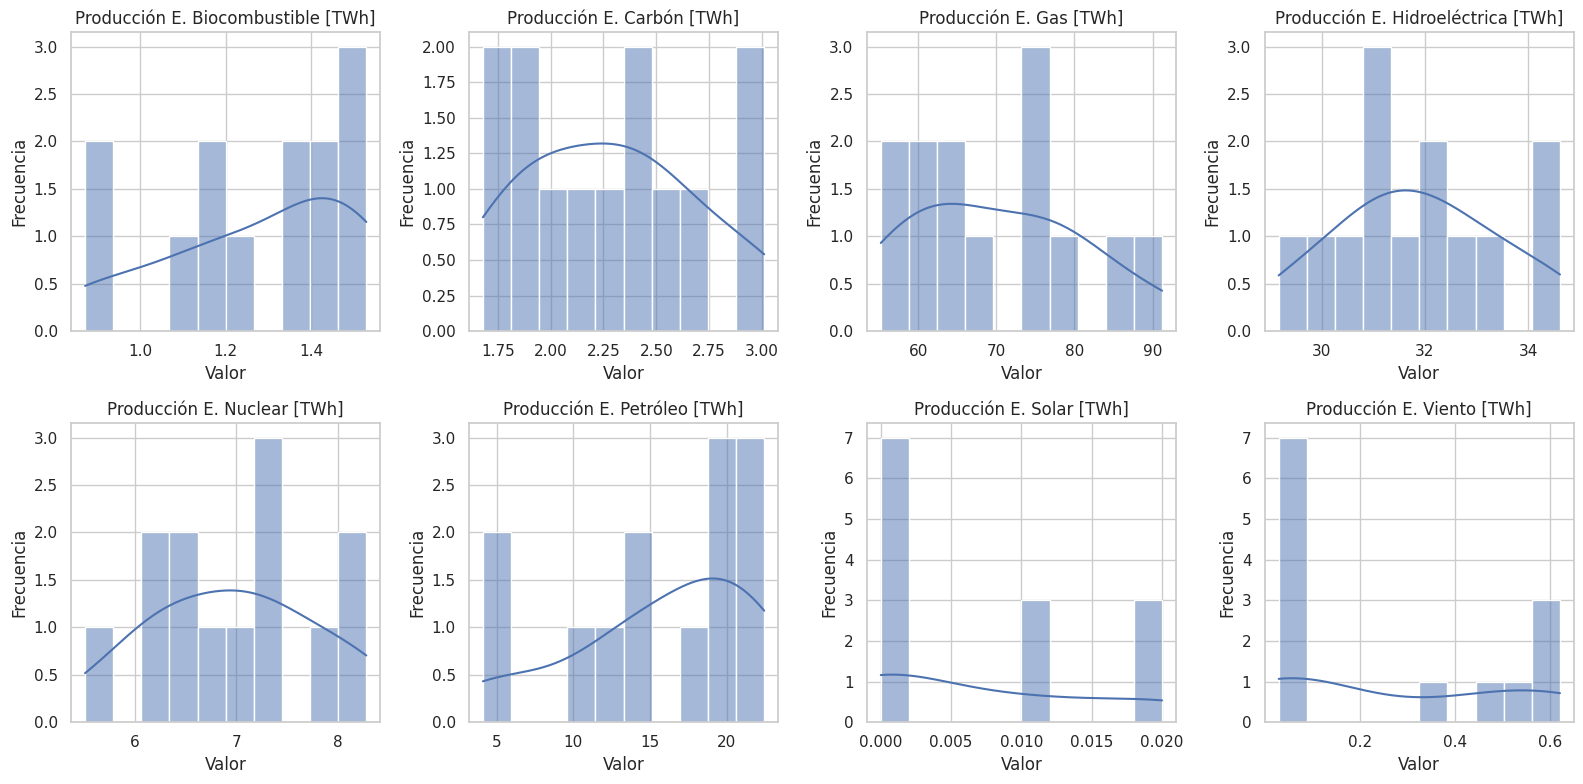

In [198]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, col in enumerate(data_sin_outliers.columns):
    row = i // 4
    col_index = i % 4
    sns.histplot(data_sin_outliers[col], ax=axes[row, col_index], bins=10, kde=True)
    axes[row, col_index].set_title(col)
    axes[row, col_index].set_xlabel("Valor")
    axes[row, col_index].set_ylabel("Frecuencia")

# Ajustar el layout
plt.tight_layout()
plt.show()

Siguiendo con el desarrollo del proyecto, primero se determina cuanta electricidad se generó en los dos últimos dos años debido a fuentes de energía eólicas.

In [100]:
eolica_2022_2023 = produccion_tipo_arg.tail(2)[['Año','Producción E. Viento [TWh]']]
eolica_2022_2023

,Año,Producción E. Viento [TWh]
1134,2022,14.16
1135,2023,14.49


Al no generarse más de 24 TWh en los dos últimos años, se refuerza la idea de poder invertir en el país.

Ahora, se separan los 20 años en décadas para graficar cuanto se produjo de electricidad debido a su fuente de obtención.

In [173]:
# Se agrupa por décadas para una mayor comprensión
data_1= produccion_tipo_arg.drop(columns='Año')
decada_2004_2013 = data_1.loc[1112:1125].sum()
decada_2014_2023 = data_1.loc[1126:1135].sum()
decadas_datos ={
    '2004-2013':decada_2004_2013,
    '2014-2023':decada_2014_2023
}
decadas = pd.DataFrame(decadas_datos)
decadas.T

,Producción E. Biocombustible [TWh],Producción E. Carbón [TWh],Producción E. Gas [TWh],Producción E. Hidroeléctrica [TWh],Producción E. Nuclear [TWh],Producción E. Petróleo [TWh],Producción E. Solar [TWh],Producción E. Viento [TWh]
2004-2013,12.06,22.82,637.20,326.22,71.50,137.09,0.03,1.23
2014-2023,17.63,18.83,849.87,286.26,78.83,143.21,10.70,59.78


In [102]:
rango = decadas
p_bio = decadas.loc['Producción E. Biocombustible [TWh]']
p_car = decadas.loc['Producción E. Carbón [TWh]']
p_gas = decadas.loc['Producción E. Gas [TWh]']
p_hidro = decadas.loc['Producción E. Hidroeléctrica [TWh]']
p_nuclear = decadas.loc['Producción E. Nuclear [TWh]']
p_pet = decadas.loc['Producción E. Petróleo [TWh]']
p_solar = decadas.loc['Producción E. Solar [TWh]']
p_viento = decadas.loc['Producción E. Viento [TWh]']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_bio,
    name='Producción E. Biocombustible [TWh]',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_car,
    name='Producción E. Carbón [TWh]',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_gas,
    name='Producción E. Gas [TWh]',
    marker_color='royalblue'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_hidro,
    name='Producción E. Hidroeléctrica [TWh]',
    marker_color='goldenrod'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_nuclear,
    name='Producción E. Nuclear [TWh]',
    marker_color='darkorchid'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_pet,
    name='Producción E. Petróleo [TWh]',
    marker_color='lime'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_solar,
    name='Producción E. Solar [TWh]',
    marker_color='indigo'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_viento,
    name='Producción E. Viento [TWh]',
    marker_color='red'
))
fig.update_layout(
    title='Producción de Electricidad por diferentes fuentes Argentina las últimas dos décadas',
    xaxis_title='Década',
    yaxis_title='Producción [TWh]',
    barmode='group',
    template='plotly_white',
    width=1200,
    height=600
)

Por lo que se observa en este último gráfico, durante la década del 2004 al 2013, la producción de electricidad eólica es nula o de mínimo aporte al país (1.23 TWh). A partir del año 2014, debido a las políticas públicas como el Programa de Generación Eléctrica a partir de Energías Renovables (GENREN), el aporte de este tipo de fuente crece notablemente. Se generaron 59.78 TWh desde el 2014 hasta el 2023 pero sigue representando una pequeña cantidad respecto a la producción nacional.

Si se nota un marcado crecimiento en la generación de electricidad utilizando gas natural. Esto se debe a la exploración y explotación de nuevos yacimientos como Vaca Muerta. Este es un aspecto a tener en cuenta a la hora de generar electricidad por otras fuentes ya que más de la mitad del mercado eléctrico lo posee el gas. Generar electricidad por gas natural es más barato que por fuente eólica y debe tenerse en cuenta cuando se haga la evaluación económica.

Se concluye que el aporte de electricidad generada por energía eólica es bajo comparado con otras fuentes. Es recomendable insertarse en el mercado eléctrico de Argentina debido las políticas del país respecto a la generación de electricidad a partir de fuentes renovables, pero, es necesario realizar un extenso estudio económico de viabilidad ya que generar electricidad por otras fuentes sigue siendo más barato.


Finalmente, se grafica la producción total de electricidad por cada tipo de fuente tomando el dataset de partida (produccion_tipo_arg) y el que se generó con la eliminación de los outliers (data_sin_outliers). Luego, se comparan sus gráficos

In [206]:
# Se agrupa por el total de los 20 años
data_2= produccion_tipo_arg.drop(columns='Año')
total_arg = data_2.sum()
total_datos ={
    'Total':total_arg,
}
p_t_a = pd.DataFrame(total_datos)
produccion_total_arg = p_t_a.T
produccion_total_arg

,Producción E. Biocombustible [TWh],Producción E. Carbón [TWh],Producción E. Gas [TWh],Producción E. Hidroeléctrica [TWh],Producción E. Nuclear [TWh],Producción E. Petróleo [TWh],Producción E. Solar [TWh],Producción E. Viento [TWh]
Total,29.69,41.65,1487.07,612.48,150.33,280.3,10.73,61.01


<ipython-input-208-43e6606650e7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




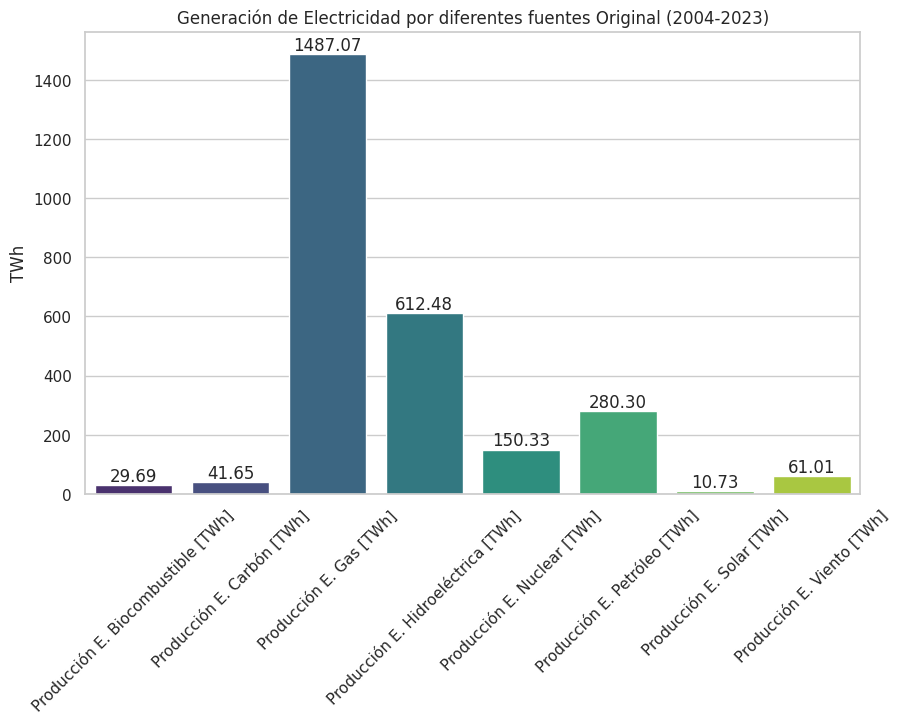

In [208]:
plt.figure(figsize=(10, 6))
values_1d = produccion_total_arg.values.flatten()
sns.barplot(x=produccion_total_arg.columns, y=values_1d, palette='viridis')
for index, value in enumerate(values_1d):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.title("Generación de Electricidad por diferentes fuentes Original (2004-2023)")
plt.xlabel("")
plt.ylabel("TWh")
plt.xticks(rotation=45)
plt.show()

Ahora se realiza el mismo gráfico pero con el dataset sin outliers

In [189]:
data_sin_outliers.head()

,Producción E. Biocombustible [TWh],Producción E. Carbón [TWh],Producción E. Gas [TWh],Producción E. Hidroeléctrica [TWh],Producción E. Nuclear [TWh],Producción E. Petróleo [TWh],Producción E. Solar [TWh],Producción E. Viento [TWh]
1116,0.87,1.68,55.21,30.46,7.87,4.10,0.0,0.07
1117,0.92,2.18,55.70,34.22,6.87,5.79,0.0,0.07
1119,1.07,2.34,60.18,31.22,7.25,11.40,0.0,0.06
1120,1.21,1.94,65.41,31.20,7.39,14.72,0.0,0.04
1121,1.19,1.75,61.70,34.62,8.18,14.84,0.0,0.04


<ipython-input-210-cdd50c7846de>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




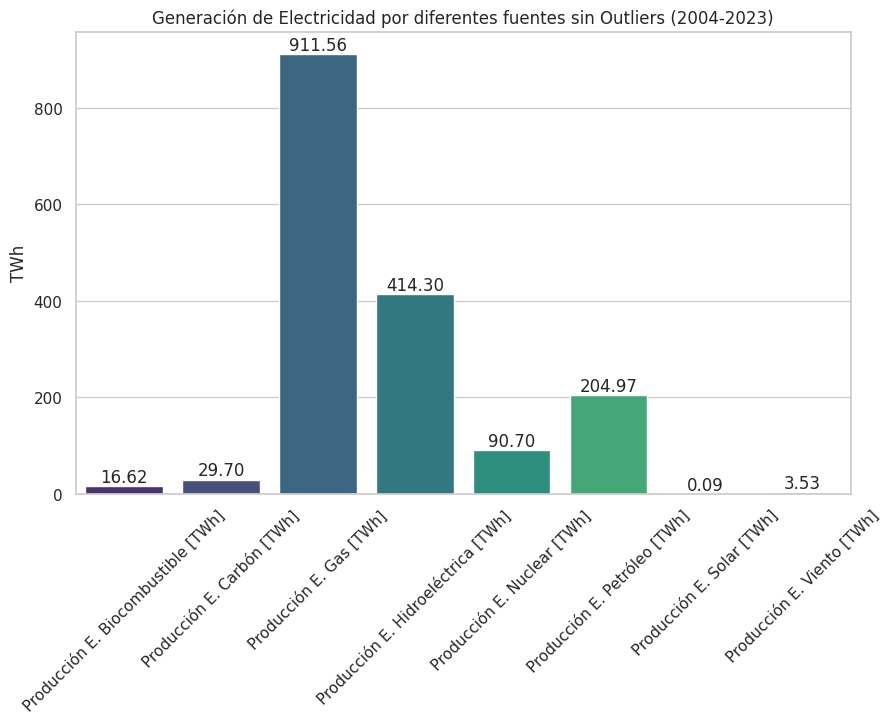

In [210]:
data_suma = data_sin_outliers.sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=data_suma.index, y=data_suma.values, palette="viridis")
for index, value in enumerate(data_suma.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.title("Generación de Electricidad por diferentes fuentes sin Outliers (2004-2023)")
plt.xlabel("")
plt.ylabel("TWh")
plt.xticks(rotation=45)
plt.show()


La diferencia en los valores es muy grande al perderse información muy valiosa por el filtrado de outliers. A veces, no es recomendable eliminar valores anómalos porque se estarían cometiendo errores

### Porcentaje de Electricidad generada por distintas fuentes desde el año 2004 al 2023 en Argentina

Finalmente, se generará un gráfico que muestre el aporte en porcentaje de cada feutne de generación de energía eléctrica en los últimos 20 años.

In [103]:
# Se filtra el dataset de electricidad argentina teniendo en cuenta el año y sus porcentajes. Se toman las mismas columnas que para la producción.
porcentajes_arg = electricidad_argentina[['Año','Porcentaje E. Biocombustible [% total]','Porcentaje E. Carbón [% total]','Porcentaje E. Gas [% total]','Porcentaje E. Hidroeléctrica [% total]','Porcentaje E. Nuclear [% total]','Porcentaje E. Petróleo [% total]','Porcentaje E. Solar [% total]','Porcentaje E. Viento [% total]']]
porcentajes_arg.head()

,Año,Porcentaje E. Biocombustible [% total],Porcentaje E. Carbón [% total],Porcentaje E. Gas [% total],Porcentaje E. Hidroeléctrica [% total],Porcentaje E. Nuclear [% total],Porcentaje E. Petróleo [% total],Porcentaje E. Solar [% total],Porcentaje E. Viento [% total]
1116,2004,0.868,1.676,55.067,30.381,7.850,4.089,0.0,0.070
1117,2005,0.870,2.061,52.671,32.359,6.496,5.475,0.0,0.066
1118,2006,0.926,1.754,49.722,33.518,6.806,7.211,0.0,0.062
1119,2007,0.943,2.061,53.013,27.502,6.387,10.042,0.0,0.053
1120,2008,0.993,1.591,53.654,25.593,6.062,12.074,0.0,0.033


In [104]:
porcentajes_2023=porcentajes_arg.tail(1)
porcentajes_2023

,Año,Porcentaje E. Biocombustible [% total],Porcentaje E. Carbón [% total],Porcentaje E. Gas [% total],Porcentaje E. Hidroeléctrica [% total],Porcentaje E. Nuclear [% total],Porcentaje E. Petróleo [% total],Porcentaje E. Solar [% total],Porcentaje E. Viento [% total]
1135,2023,1.519,0.391,47.826,21.619,5.833,11.249,2.118,9.444


Un dato para tener en cuenta es que en el último año (2023) la participación de la energía eólica alcanzó un valor de 9.444 % del mercado.

In [217]:
datos = {
    "Fuentes de Energía": ["Biocombustible", "Carbón", "Gas", "Hidroeléctrica", "Nuclear", "Petróleo", "Solar", "Viento"],
    "Porcentaje Mercado": [1.519, 0.391, 47.826, 21.619, 5.833, 11.249, 2.118, 9.444]
}
df = pd.DataFrame(datos)
fig = px.scatter(
    df,
    x="Fuentes de Energía",
    y="Porcentaje Mercado",
    size="Porcentaje Mercado",
    color="Fuentes de Energía",
    hover_name="Fuentes de Energía",
    text='Porcentaje Mercado',
    size_max=80,
    title="Porcentaje de Generación de Electricidad por Fuente Año 2023 Argentina"
)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='top center')
fig.update_layout(
    xaxis_title="Fuente de Energía",
    yaxis_title="Porcentaje en el  Mercado [%]",
    width=1000,
    height=600
)
fig.show()


Aquí también se cumple una de las condiciones establecidas, la producción en el último año no supera el 10%.

In [106]:
# Continuamos para el intervalo en estudio
porcentajes_argentina = porcentajes_arg.drop(columns='Año')
porcentajes_argentina.head()

,Porcentaje E. Biocombustible [% total],Porcentaje E. Carbón [% total],Porcentaje E. Gas [% total],Porcentaje E. Hidroeléctrica [% total],Porcentaje E. Nuclear [% total],Porcentaje E. Petróleo [% total],Porcentaje E. Solar [% total],Porcentaje E. Viento [% total]
1116,0.868,1.676,55.067,30.381,7.850,4.089,0.0,0.070
1117,0.870,2.061,52.671,32.359,6.496,5.475,0.0,0.066
1118,0.926,1.754,49.722,33.518,6.806,7.211,0.0,0.062
1119,0.943,2.061,53.013,27.502,6.387,10.042,0.0,0.053
1120,0.993,1.591,53.654,25.593,6.062,12.074,0.0,0.033


In [107]:
porcentajes_argentina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1116 to 1135
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Porcentaje E. Biocombustible [% total]  20 non-null     float64
 1   Porcentaje E. Carbón [% total]          20 non-null     float64
 2   Porcentaje E. Gas [% total]             20 non-null     float64
 3   Porcentaje E. Hidroeléctrica [% total]  20 non-null     float64
 4   Porcentaje E. Nuclear [% total]         20 non-null     float64
 5   Porcentaje E. Petróleo [% total]        20 non-null     float64
 6   Porcentaje E. Solar [% total]           20 non-null     float64
 7   Porcentaje E. Viento [% total]          20 non-null     float64
dtypes: float64(8)
memory usage: 1.9 KB


In [108]:
# Se realiza un describe que mostrará el promedio de cada tipo de fuente
porcentajes_argentina_final = porcentajes_argentina.describe().T
porcentajes_argentina_final

,count,mean,std,min,25%,50%,75%,max
Porcentaje E. Biocombustible [% total],20.0,1.09450,0.230215,0.802,0.96100,1.0430,1.09550,1.551
Porcentaje E. Carbón [% total],20.0,1.58730,0.468867,0.391,1.38225,1.6175,1.86000,2.389
Porcentaje E. Gas [% total],20.0,55.40545,4.951255,47.826,52.60475,54.0275,57.62725,65.441
Porcentaje E. Hidroeléctrica [% total],20.0,23.45295,5.342666,12.831,21.13175,22.8200,26.73250,33.518
Porcentaje E. Nuclear [% total],20.0,5.69065,1.058934,3.977,4.80700,5.7775,6.53225,7.850
Porcentaje E. Petróleo [% total],20.0,10.36505,4.188800,2.745,6.77700,11.4160,14.31475,15.438
Porcentaje E. Solar [% total],20.0,0.35705,0.687940,0.000,0.00000,0.0070,0.19950,2.118
Porcentaje E. Viento [% total],20.0,2.04685,3.417334,0.023,0.05975,0.3485,1.61650,9.444


In [109]:
# Se crean listas para graficar
porcentajes = porcentajes_argentina_final['mean'].tolist()
porcentajes

[1.0944999999999998,
 1.5872999999999997,
 55.405449999999995,
 23.452949999999998,
 5.690650000000001,
 10.36505,
 0.35705,
 2.04685]

In [110]:
# Se redondean a 2 decimales los porcentajes
porcentajes_round = [round(num, 2) for num in porcentajes]
porcentajes_round

[1.09, 1.59, 55.41, 23.45, 5.69, 10.37, 0.36, 2.05]

In [111]:
# Se crean las categorías directamente por una cuestión de espacio
categorias = ['Biocombustible','Carbón','Gas','Hidroeléctrica','Nuclear','Petróleo','Solar','Eólica']

In [112]:
#marker_colors = ['#FFA07A', '#20B2AA', '#FFD700', '#00CED1', '#8A2BE2', '#FF6347', '#4682B4', '#32CD32']
marker_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#17becf']
fig_barras = go.Figure([go.Bar(x=categorias, y=porcentajes_round,
                        marker_color=marker_colors,
                        text=porcentajes_round,
                        textposition='outside')])
fig_barras.update_layout(
    title="Porcentaje de producción de electricidad por fuente de energía (2004-2023)",
    xaxis_title="",
    yaxis_title="Porcentaje [%]",
    yaxis_tickformat=',.2f',
    width=1000,
    height=800
)
fig_barras.show()


En el año 2023, la participación fuentes eólicas en la generación de electricidad fue del 9.444%, que no supera el valor establecido del 15%.

En los últimos 20 años la fuente de mayor generación de energía eléctrica se debe a la quema de gas representando más del 50 % de la producción nacional. Sigue la generación hidroeléctrica con casi un 25 % de la cuota del mercado.

La generación de electricidad por energía eólica representa un poco más del 2 %. Por lo tanto, se concluye que invertir en Argentina en parques eólicos es viable si se tienen en cuenta estos números.

## Conclusión para Argentina

Argentina es un país atractivo para implementar parques eólicos y se recomienda invertir en dicho país. Esta decisión se debe a varios factores:

- Se produce menos de lo que se demanda y es necesario importar energía. Por lo tanto, la empresa puede aportar ese faltante utilizando fuentes renovables como la eólica. Serían necesarios producir algo más de 13 TWh al año que es lo que se importó aproximadamente en los últimos dos años.

- Esos 13 TWh importados al año representan prácticamente la misma cantidad de generación de electricidad por energía eólica en los últimos dos años. Se espera una inversión inicial fuerte para cubrir esa demanda.

- La generación por energía eólica muestra un gran crecimiento y año a año, aumenta su participación en el mercado interno. Es importante proponer una buena estrategia de competitividad para recuperar la inversión inicial y generar ganancias.

- A pesar del crecimiento del parque eólico, la participación en las últimas dos décadas supera apenas el 2 % y su mayor registro es en el año 2023 con una participación del 9.44 %. Estos valores están por debajo de lo estipulado (10% de participación en el mercado) por lo que se recomienda fuertemente la instalación de parques eólicos en el país.


- Argentina cuenta con un potencial eólico significativo, especialmente en regiones como la Patagonia, donde se han registrado velocidades de viento superiores a 9 m/s.

- En los últimos años, el gobierno argentino ha implementado políticas favorables para la energía renovable, como la Ley de Energías Renovables (Ley 27.191) que busca alcanzar un 20% de la generación eléctrica a partir de fuentes renovables para 2025.


## Análisis de Producción, Demanda e Importación de Electricidad para Brasil

Este análisis es el mismo que se hizo para Argentina, por lo tanto, los códigos son similares.

In [113]:
# Se analiza la producción, demanda e importación en Brasil
brazil = produccion.loc[produccion['País']=='Brazil']
brazil.head()

,País,Año,Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Importaciones E. Total [TWh]
3041,Brazil,2004,424.87,387.49,37.38
3042,Brazil,2005,442.11,403.07,39.04
3043,Brazil,2006,460.61,419.45,41.16
3044,Brazil,2007,483.98,445.15,38.83
3045,Brazil,2008,505.39,463.18,42.21


In [114]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=brazil['Año'], y=brazil['Demanda Electricidad [TWh]'], mode='lines', name='Demanda [TWh]'))
fig.add_trace(go.Scatter(x=brazil['Año'], y=brazil['Producción Total Electricidad [TWh]'], mode='lines', name='Producción [TWh)]'))
fig.add_trace(go.Scatter(x=brazil['Año'], y=brazil['Importaciones E. Total [TWh]'], mode='lines', name='Importaciones [TWh]'))
fig.update_layout(title='Demanda, Producción e Importación de Electricidad en Brasil (2000-2023)',
                  xaxis_title='Año',
                  yaxis_title='TWh',
                  height=600, width=1000
                  )
fig.show()

Al igual que en Argentina, se observa una relación entre las 3 variables que indican que cuando la demanda de electricidad sube, sube la producción y las importaciones. Sin embargo, la generación de electricidad viene en aumento y está igualando la demanda. Esto se nota también por la disminución de las importaciones de energía eléctrica. En los dos últimos años, Brasil exportó casi 13 TWh.

El volumen de producción de Brasil es de más de 500 THw (560 aproximadamente). Esta diferencia se debe a la superficie del país y su población.

### Análisis Estadístico Variables de Producción, Demanda e Importación

In [115]:
# Se hace un describe
brazil.describe()

,Año,Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Importaciones E. Total [TWh]
count,20.00000,20.000000,20.000000,20.000000
mean,2013.50000,583.698500,550.266000,33.432500
std,5.91608,87.166962,93.861009,8.945546
min,2004.00000,424.870000,387.490000,12.910000
25%,2008.75000,505.960000,465.422500,31.575000
50%,2013.50000,613.400000,574.860000,36.120000
75%,2018.25000,640.647500,608.232500,40.050000
max,2023.00000,726.090000,713.180000,42.210000


Observando los resultados del describe:
- En los 20 años de estudio, en promedio, se demandó más electricidad de lo que se necesitó. La diferencia entre ambos es de 33.43 TWh
- La diferencia entre los valores mínimos y máximos de producción es de 301 TWh aproximadamente, la de demanda es de 326 TWh y la de importación es igual a 30 TWh.
- La diferencia entre producción y demanda es


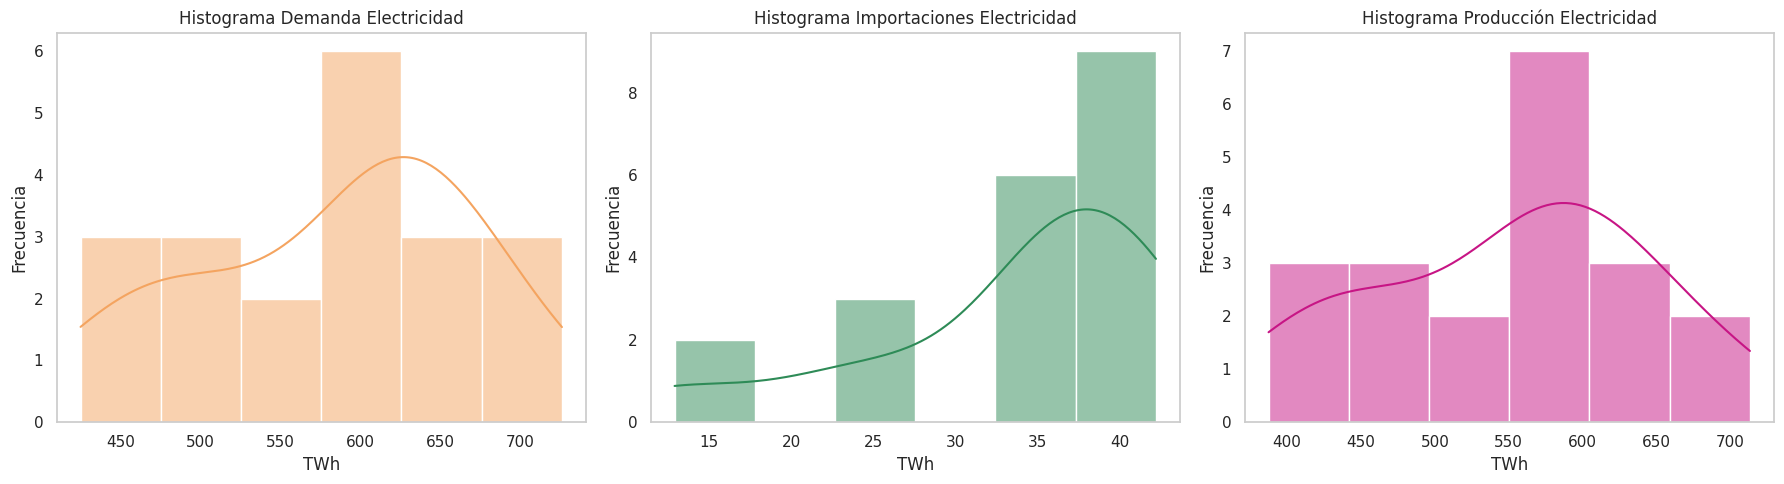

In [116]:
# Se realiza el histograma
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# Demanda de Electricidad en Brasil
sns.histplot(brazil['Demanda Electricidad [TWh]'], kde=True, color='sandybrown', ax=axs[0])
axs[0].set_title("Histograma Demanda Electricidad")
axs[0].set_xlabel("TWh")
axs[0].set_ylabel("Frecuencia")
axs[0].grid(False)
# Importación de Electricidad en Brasil
sns.histplot(brazil['Importaciones E. Total [TWh]'], kde=True, color='seagreen', ax=axs[1])
axs[1].set_title("Histograma Importaciones Electricidad")
axs[1].set_xlabel("TWh")
axs[1].set_ylabel("Frecuencia")
axs[1].grid(False)
# Producción de Electricidad en Brasil
sns.histplot(brazil['Producción Total Electricidad [TWh]'], kde=True, color='mediumvioletred', ax=axs[2])
axs[2].set_title("Histograma Producción Electricidad")
axs[2].set_xlabel("TWh")
axs[2].set_ylabel("Frecuencia")
axs[2].grid(False)
plt.tight_layout()
plt.show()

In [117]:
# Se determina la curtosis
k_d_b = kurtosis(brazil['Demanda Electricidad [TWh]'])
k_i_b = kurtosis(brazil['Importaciones E. Total [TWh]'])
k_p_b = kurtosis(brazil['Producción Total Electricidad [TWh]'])
print ("Curtosis Demanda = ",k_d_b)
print ("Curtosis Importaciones = ",k_i_b)
print ("Curtosis Producción = ",k_p_b)

Curtosis Demanda =  -0.9505385561856001
Curtosis Importaciones =  0.4432451621917699
Curtosis Producción =  -0.941450005013508


Histograma Demanda:

- El Histograma de Demanda muestra una distribución asimétrica con sesgo negativo.
- La moda se encuentra en el rango de 600 TWh, con una frecuencia de 6. La media es menor que la moda.
- La Curtosis nos indica que la distribución es platicúrtica (-0.95), es decir que existe una gran dispersión de los datos.
- No se observan outliers a simple vista pero deben ser analizados por la dispersión de los datos.

Histograma Importaciones:

- El Histograma de Importaciones también muestra una distribución asimétrica con sesgo negativo muy marcado.
- La moda se encuentra en el rango de los 40 TWh, con una frecuencia de 9.
- La Curtosis nos indica que la distribución es leptocúrtica (0.44), es decir que los datos están concentrados hacia la media.
- Por los saltos de intervalos se sospecha de outliers que luego serán analizados.

Histograma Producción:

- El Histograma de Producción muestra una distribución asimétrica con sesgo negativo no tan marcado como el de Demanda.
- La moda se encuentra en el rango de los 550 - 600 TWh, con una frecuencia de 7. La media es menor que la moda.
- La Curtosis nos indica que la distribución es platicúrtica (-0.94), es decir que existe una gran dispersión de los datos.
- No se observan outliers a simple vista pero deben ser analizados por la dispersión de los datos.

In [211]:
fig = px.box(brazil,
             y=brazil['Demanda Electricidad [TWh]'],
             title='Boxplot de Demanda (2004-2003)',
             points='all',
             template='plotly_white',
             color_discrete_sequence=['sandybrown']
            )
fig.update_layout(
    yaxis_title='Demanda',
    xaxis_title='2004-2023',
    width=500,
    height=500
)
fig.show()

In [212]:
fig = px.box(brazil,
             y=brazil['Importaciones E. Total [TWh]'],
             title='Boxplot de importaciones (2004-2003)',
             points='all',
             template='plotly_white',
             color_discrete_sequence=['seagreen']
            )
fig.update_layout(
    yaxis_title='Importaciones',
    xaxis_title='2004-2023',
    width=500,
    height=500
)
fig.show()

Se reconocen 2 outliers y resultan ser los últimos dos valores (año 2022 y 2023). Esto tiene sentido en realidad, ya que, en el gráfico combinado de producción, demanda e importación, se percibe un aumento considerable en la producción cubriendo casi la demanda.

Como consecuencia de esto, Brasil no necesita importar tanta energía y por eso, esos valores disminuyen tanto y parecen datos anómalos.

De todas maneras, se estudia si realmente son esos dos valores por el método del IQR.

In [120]:
Q1 = brazil['Importaciones E. Total [TWh]'].quantile(0.25)
Q3 = brazil['Importaciones E. Total [TWh]'].quantile(0.75)
IQR = Q3-Q1
Mediana = brazil['Importaciones E. Total [TWh]'].median()
minimo = brazil['Importaciones E. Total [TWh]'].min()
maximo = brazil['Importaciones E. Total [TWh]'].max()
B1 = (Q1-1.5*IQR)
B2 = (Q3+1.5*IQR)
print ("Primer Cuartil",Q1)
print ("Tercer Cuartil",Q3)
print ("Rango Intercuartil",IQR)
print ("Valor Mínimo",minimo)
print ("Valor Máximo",maximo)
print ("Bigote inferior",B1)
print ("Bigote superior",B2)

Primer Cuartil 31.575000000000003
Tercer Cuartil 40.05
Rango Intercuartil 8.474999999999994
Valor Mínimo 12.91
Valor Máximo 42.21
Bigote inferior 18.86250000000001
Bigote superior 52.76249999999999


In [121]:
outliers_br = (brazil['Importaciones E. Total [TWh]']<B1) | (brazil['Importaciones E. Total [TWh]']>B2)
outliers_br

,Importaciones E. Total [TWh]
3041,False
3042,False
3043,False
3044,False
3045,False
3046,False
3047,False
3048,False
3049,False
3050,False


In [122]:
total_outliers_br = brazil[outliers_br]
print ("La cantidad de outliers son",len(total_outliers_br))

La cantidad de outliers son 2


In [213]:
fig = px.box(brazil,
             y=brazil['Producción Total Electricidad [TWh]'],
             title='Boxplot de producción (2004-2003)',
             points='all',
             template='plotly_white',
             color_discrete_sequence=['mediumvioletred']
            )
fig.update_layout(
    yaxis_title='Producción',
    xaxis_title='2004-2023',
    width=500,
    height=500
)
fig.show()

Los boxplots de cada variable muestran consistencia, menos el de importación. Sin embargo, se justifican ya que es notorio el crecimiento en la producción, disminuyendo de este modo, las importaciones de electricidad.

#### Búsqueda de correlación entre Demanda, Producción e Importación.

In [124]:
# Se crea la matriz de correlación
correlacionar_br = brazil.drop(columns=['País','Año'])
correlacionar_br.head()

,Demanda Electricidad [TWh],Producción Total Electricidad [TWh],Importaciones E. Total [TWh]
3041,424.87,387.49,37.38
3042,442.11,403.07,39.04
3043,460.61,419.45,41.16
3044,483.98,445.15,38.83
3045,505.39,463.18,42.21


                                     Demanda Electricidad [TWh]  \
Demanda Electricidad [TWh]                             1.000000   
Producción Total Electricidad [TWh]                    0.997848   
Importaciones E. Total [TWh]                          -0.725731   

                                     Producción Total Electricidad [TWh]  \
Demanda Electricidad [TWh]                                      0.997848   
Producción Total Electricidad [TWh]                             1.000000   
Importaciones E. Total [TWh]                                   -0.769279   

                                     Importaciones E. Total [TWh]  
Demanda Electricidad [TWh]                              -0.725731  
Producción Total Electricidad [TWh]                     -0.769279  
Importaciones E. Total [TWh]                             1.000000  


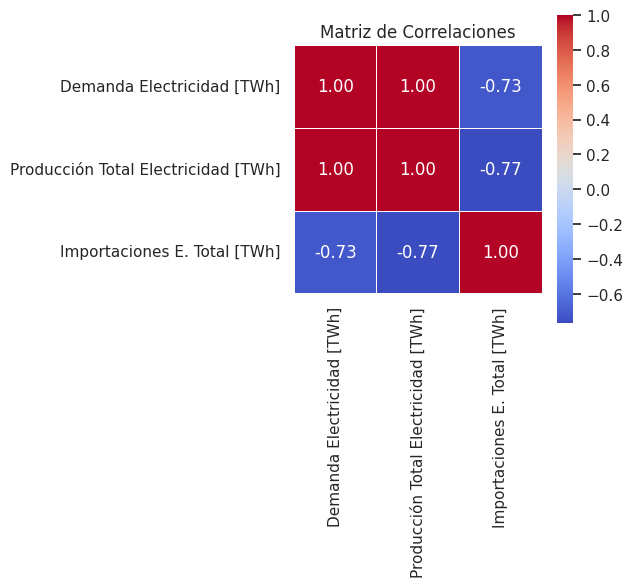

In [125]:
correlation_matrix_br= correlacionar_br.corr()
print(correlation_matrix_br)
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix_br, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
plt.title('Matriz de Correlaciones')
plt.show()

Se observa una correlación fuerte entre la Demanda y la Producción. Se grafican.

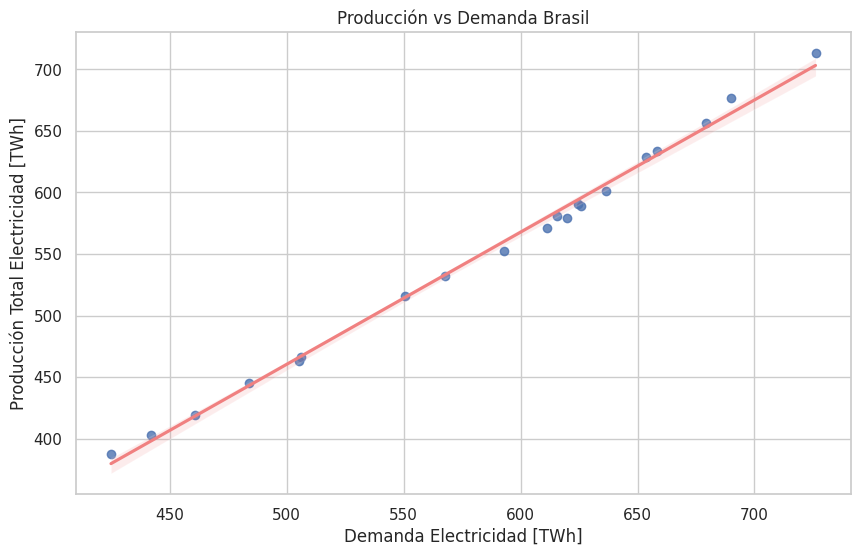

In [126]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='Demanda Electricidad [TWh]', y='Producción Total Electricidad [TWh]', data=brazil, line_kws={'color': 'lightcoral'})
ax.set_title('Producción vs Demanda Brasil')
ax.set_xlabel('Demanda Electricidad [TWh]')
ax.set_ylabel('Producción Total Electricidad [TWh]')
plt.show()

In [127]:
X = brazil['Demanda Electricidad [TWh]'].values.reshape(-1, 1)
y = brazil['Producción Total Electricidad [TWh]'].values
model = LinearRegression()
model.fit(X, y)
pendiente = model.coef_[0]
ordenada = model.intercept_
# Calculamos R^2
r2 = model.score(X, y)
# Formatear la ecuación de la regresión y el R^2
ecuacion = f"f(x)={pendiente:.2f}*x {ordenada:.2f}"
r2 = f"{r2:.2f}"

# Imprimir resultados
print ("La expresión matemática de la regresión lineal es",ecuacion, "y su parámetro R^2 es",r2)

La expresión matemática de la regresión lineal es f(x)=1.07*x -76.91 y su parámetro R^2 es 1.00


La ecuación y el gráfico también muestran una tendencia positiva. Es decir, que a medida que aumenta la demanda, aumenta la producción. El coeficiente R^2 es exactamente 1. Esto demuestra una dependencia lineal de las dos variables.

En este caso, también se considera que las variables son causales ya que debido a el esfuerzo realizado por el país, se está logrando equiparar la demanda con la producción.

Con este análisis de producción, demanda e importación se determina que es interesante insertarse en el mercado eléctrico brasilero y aportar como mínimo lo que el país no logra cubrir. Lo que mínimamente se requiere es generar 13 KWh de electricidad (valor de los últimos dos años es 12,91 TWh).

### Producción de Electricidad por distintas fuentes en Brasil (2004-2013)

In [128]:
# Se filtra el dataset para Brasil
electricidad_brasil= america_latina.loc[america_latina['País']=='Brazil' ]

En este caso sucede los mismo que en Argentina, hay columnas que representan la suma de otras. Se pasa directamente a las columnas de interés para poder graficarlas.

In [129]:
# Para la producción se toman las mismas columnas que Argentina
produccion_tipo_br = electricidad_brasil[['Año','Producción E. Biocombustible [TWh]','Producción E. Carbón [TWh]','Producción E. Gas [TWh]','Producción E. Hidroeléctrica [TWh]','Producción E. Nuclear [TWh]','Producción E. Petróleo [TWh]','Producción E. Solar [TWh]','Producción E. Viento [TWh]']]
produccion_tipo_br.head()

,Año,Producción E. Biocombustible [TWh],Producción E. Carbón [TWh],Producción E. Gas [TWh],Producción E. Hidroeléctrica [TWh],Producción E. Nuclear [TWh],Producción E. Petróleo [TWh],Producción E. Solar [TWh],Producción E. Viento [TWh]
3041,2004,12.52,10.37,19.26,320.80,11.61,12.87,0.0,0.06
3042,2005,13.64,10.68,18.81,337.46,9.85,12.54,0.0,0.09
3043,2006,14.85,10.47,18.26,348.80,13.75,13.08,0.0,0.24
3044,2007,18.06,10.08,15.50,374.02,12.35,14.48,0.0,0.66
3045,2008,19.79,11.96,28.78,369.56,13.97,17.94,0.0,1.18


In [130]:
eolica_2022_2023_br = produccion_tipo_br.tail(2)[['Año','Producción E. Viento [TWh]']]
eolica_2022_2023_br

,Año,Producción E. Viento [TWh]
3059,2022,81.63
3060,2023,95.74


Estos valores indican que se supera el máximo establecido de 24 TWh al año. Esto de debe a que el orden de magnitud de producción en Brasil es mucho mayor comparado con otros países de Latinoamérica.

Se prevee que la generación por este medio crezca a lo largo de los años y será necesaria una mayor inversión para poder producir en cantidad y a buen precio.

Por lo tanto, no se recomienda invertir en Brasil hasta realizar un exhaustivo análisis económico para determinar su viabilidad.

Notas de Interés:

https://www.infobae.com/america/agencias/2024/09/29/la-eolica-sera-determinante-en-la-transicion-energetica-de-brasil-segun-abeeolica/

https://econojournal.com.ar/2024/04/brasil-entre-los-paises-de-mayor-capacidad-renovable-del-mundo/



Se agrupan por décadas

In [131]:
# Agrupación por décadas
data_2= produccion_tipo_br.drop(columns='Año')
decada_2004_2013 = data_2.loc[3041:3050].sum()
decada_2014_2023 = data_2.loc[3051:3060].sum()
decadas_datos ={
    '2004-2013':decada_2004_2013,
    '2014-2023':decada_2014_2023
}
decadas_2 = pd.DataFrame(decadas_datos)
decadas_2.T

,Producción E. Biocombustible [TWh],Producción E. Carbón [TWh],Producción E. Gas [TWh],Producción E. Hidroeléctrica [TWh],Producción E. Nuclear [TWh],Producción E. Petróleo [TWh],Producción E. Solar [TWh],Producción E. Viento [TWh]
2004-2013,243.05,123.86,291.28,3779.58,136.16,161.49,0.00,19.98
2014-2023,531.45,220.52,629.92,3889.44,151.33,185.92,120.46,520.88


In [132]:
rango = decadas_2
p_bio = decadas_2.loc['Producción E. Biocombustible [TWh]']
p_car = decadas_2.loc['Producción E. Carbón [TWh]']
p_gas = decadas_2.loc['Producción E. Gas [TWh]']
p_hidro = decadas_2.loc['Producción E. Hidroeléctrica [TWh]']
p_nuclear = decadas_2.loc['Producción E. Nuclear [TWh]']
p_pet = decadas_2.loc['Producción E. Petróleo [TWh]']
p_solar = decadas_2.loc['Producción E. Solar [TWh]']
p_viento = decadas_2.loc['Producción E. Viento [TWh]']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_bio,
    name='Producción E. Biocombustible [TWh]',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_car,
    name='Producción E. Carbón [TWh]',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_gas,
    name='Producción E. Gas [TWh]',
    marker_color='gold'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_hidro,
    name='Producción E. Hidroeléctrica [TWh]',
    marker_color='mediumorchid'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_nuclear,
    name='Producción E. Nuclear [TWh]',
    marker_color='dodgerblue'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_pet,
    name='Producción E. Petróleo [TWh]',
    marker_color='lime'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_solar,
    name='Producción E. Solar [TWh]',
    marker_color='indigo'
))
fig.add_trace(go.Bar(
    x=decadas.columns,
    y=p_viento,
    name='Producción E. Viento [TWh]',
    marker_color='red'
))
fig.update_layout(
    title='Producción de Electricidad por diferentes fuentes Brasil (2004-2023)',
    xaxis_title='Década',
    yaxis_title='Producción [TWh]',
    barmode='group',
    template='plotly_white',
    width=1200,
    height=600
)

En la década del 2004-2013, la producción de electricidad en Brasil se generó principalmente por centrales hidroeléctricas. La participación de la energía eólica fue de apenas 20 TWh.

En la segunda década (2014-2023), la generación hidroeléctrica encabeza el ranking en producción nacional. El aporte de la fuente eólica creció notablemente, llegando a ser la cuarta en importancia.

En este caso, la empresa debería haber invertido antes del 2013. Se sostiene la idea que no es recomendable, hasta que no se realicen otros estudios, insertarse en el mercado brasilero.

### Porcentaje de Electricidad generada por distintas fuentes desde el año 2004 al 2023 en Brasil

In [133]:
porcentajes_brasil= electricidad_brasil[['Porcentaje E. Biocombustible [% total]','Porcentaje E. Carbón [% total]','Porcentaje E. Gas [% total]','Porcentaje E. Hidroeléctrica [% total]','Porcentaje E. Nuclear [% total]','Porcentaje E. Petróleo [% total]','Porcentaje E. Solar [% total]','Porcentaje E. Viento [% total]']]
porcentajes_brasil.head()

,Porcentaje E. Biocombustible [% total],Porcentaje E. Carbón [% total],Porcentaje E. Gas [% total],Porcentaje E. Hidroeléctrica [% total],Porcentaje E. Nuclear [% total],Porcentaje E. Petróleo [% total],Porcentaje E. Solar [% total],Porcentaje E. Viento [% total]
3041,3.231,2.676,4.970,82.789,2.996,3.321,0.0,0.015
3042,3.384,2.650,4.667,83.722,2.444,3.111,0.0,0.022
3043,3.540,2.496,4.353,83.157,3.278,3.118,0.0,0.057
3044,4.057,2.264,3.482,84.021,2.774,3.253,0.0,0.148
3045,4.273,2.582,6.214,79.788,3.016,3.873,0.0,0.255


In [134]:
porcentajes_2023_br=porcentajes_brasil.tail(1)
porcentajes_2023_br

,Porcentaje E. Biocombustible [% total],Porcentaje E. Carbón [% total],Porcentaje E. Gas [% total],Porcentaje E. Hidroeléctrica [% total],Porcentaje E. Nuclear [% total],Porcentaje E. Petróleo [% total],Porcentaje E. Solar [% total],Porcentaje E. Viento [% total]
3060,7.532,2.41,5.351,60.473,2.035,1.523,7.252,13.424


En este gráfico, se puede observar que el porcentaje de participación en el mercado es del 13,5% aproximadamente. Este es un valor que supera el límite establecido por la empresa.

In [221]:
datos = {
    "Fuentes de Energía": ["Biocombustible", "Carbón", "Gas", "Hidroeléctrica", "Nuclear", "Petróleo", "Solar", "Viento"],
    "Porcentaje Mercado": [7.532, 2.41, 5.351, 60.473, 2.035, 1.523, 7.252, 13.424]
}
df = pd.DataFrame(datos)
fig = px.scatter(
    df,
    x="Fuentes de Energía",
    y="Porcentaje Mercado",
    size="Porcentaje Mercado",
    color="Fuentes de Energía",
    hover_name="Fuentes de Energía",
    text='Porcentaje Mercado',
    size_max=80,
    title="Porcentaje de Generación de Electricidad por Fuente Año 2023 Brasil"
)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='top center')
fig.update_layout(
    xaxis_title="Fuente de Energía",
    yaxis_title="Porcentaje en el  Mercado [%]",
    width=1000,
    height=600
)
fig.show()


In [136]:
porcentajes_brasil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 3041 to 3060
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Porcentaje E. Biocombustible [% total]  20 non-null     float64
 1   Porcentaje E. Carbón [% total]          20 non-null     float64
 2   Porcentaje E. Gas [% total]             20 non-null     float64
 3   Porcentaje E. Hidroeléctrica [% total]  20 non-null     float64
 4   Porcentaje E. Nuclear [% total]         20 non-null     float64
 5   Porcentaje E. Petróleo [% total]        20 non-null     float64
 6   Porcentaje E. Solar [% total]           20 non-null     float64
 7   Porcentaje E. Viento [% total]          20 non-null     float64
dtypes: float64(8)
memory usage: 1.9 KB


In [137]:
porcentajes_brasil_final = porcentajes_brasil.describe().T
porcentajes_brasil_final

,count,mean,std,min,25%,50%,75%,max
Porcentaje E. Biocombustible [% total],20.0,6.73220,2.132871,3.231,4.74925,7.3545,8.60450,9.342
Porcentaje E. Carbón [% total],20.0,3.07910,0.835131,2.139,2.42575,2.6630,3.73350,4.642
Porcentaje E. Gas [% total],20.0,8.04805,3.531506,2.859,4.90750,7.7680,10.59375,13.728
Porcentaje E. Hidroeléctrica [% total],20.0,71.15065,9.874891,55.299,63.01625,67.1475,81.10900,84.021
Porcentaje E. Nuclear [% total],20.0,2.65100,0.317014,2.035,2.51150,2.6890,2.83700,3.278
Porcentaje E. Petróleo [% total],20.0,3.20115,1.021350,1.523,2.57550,3.1195,3.44975,5.834
Porcentaje E. Solar [% total],20.0,0.88795,1.885000,0.000,0.00000,0.0015,0.69375,7.252
Porcentaje E. Viento [% total],20.0,4.24985,4.685977,0.015,0.26325,1.6105,8.25600,13.424


In [138]:
# Se crean listas para graficar
porcentajes_1 = porcentajes_brasil_final['mean'].tolist()
porcentajes_1

[6.732200000000001,
 3.0790999999999995,
 8.04805,
 71.15065,
 2.651,
 3.2011499999999997,
 0.88795,
 4.24985]

In [139]:
porcentajes_round_1= [round(num, 2) for num in porcentajes_1]
porcentajes_round_1

[6.73, 3.08, 8.05, 71.15, 2.65, 3.2, 0.89, 4.25]

In [140]:
# Se crean las categorías directamente por una cuestión de espacio
categorias_1 = ['Biocombustible','Carbón','Gas','Hidroeléctrica','Nuclear','Petróleo','Solar','Eólica']

In [222]:
#marker_colors = ['#FFA07A', '#20B2AA', '#FFD700', '#00CED1', '#8A2BE2', '#FF6347', '#4682B4', '#32CD32']
marker_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#17becf']
fig_barras = go.Figure([go.Bar(x=categorias_1, y=porcentajes_round_1,
                        marker_color=marker_colors,
                        text=porcentajes_round_1,
                        textposition='outside')])
fig_barras.update_layout(
    title="Porcentaje de producción de electricidad por fuente de energía Brasil (2004-2023)",
    xaxis_title="",
    yaxis_title="Porcentaje [%]",
    yaxis_tickformat=',.2f',
    width=1000,
    height=800
)
fig_barras.show()

En los últimos 20 años, la generación de electricidad por fuentes eólicas alcanzó el 4.25% del mercado de Brasil. Si bien el valor está dentro del máximo establecido, no se recomienda invertir en dicho país por el momento.

##Conclusión para Brasil

Por el estudio de los datos, no se recomienda invertir en energía eólica en Brasil porque supera lo solicitado por la empresa en varios aspectos.

- Se produce menos de lo que se demanda por lo que se estaría cumpliendo el primer requisito. Sin embargo, se requiere producir más de 30 TWh al año para cubrir ese faltante y la empresa debería realizar una inversión muy grande para cubrir esa cantidad de electricidad.

- El máximo de electricidad debido a la generación eólica supera enormemente el límite establecido. Por lo tanto, no se recomienda la investigación económica para la explotación eólica en Brasil.

- En el último año (2023), la participación en el mercado de las energías renovables por fuentes eólicas superó el máximo del 10% solicitado por la empresa.

- La participación de este tipo de generación de electricidad no alcanza el 5% en los últimos 20 años, pero si es un valor muy cercano. Debido a las políticas del país, se está favoreciendo la producción de electricidad por energías renovables, esperando un mayor aumento en pocos años. Tal vez, la empresa debería haber realizado este estudio unos años antes porque el panorama era diferente.

# Conclusiones finales

Luego de realizar un análisis de los datos referidos a la producción, demanda e importación de electricidad en 8 diferentes países de América Latina, se determina que de esos 8 países, Argentina y Brasil producen menos de lo que demandan. Por lo tanto, se decide estudiar estos dos países por separado para evaluar su potencial implementación de turbinas eólicas.

Analizando a Argentina, se determina que se cumplen todos los requisitos solicitados y se recomienda el estudio económico para una futura implementación de generadores eólicos en el país. El mayor aporte a la producción nacional argentina de electricidad se da por quema de gas, seguido por las centrales hidroeléctricas.

En el caso de Brasil, no se recomienda su inversión y estudio económico al no cumplirse dos de los requisitos solicitados. El mayor aporte al mercado eléctrico brasilero lo dan las centrales hidroeléctricas y la quema de gas natural.

El siguiente cuadro muestra el estado de situación de lo estudiado:

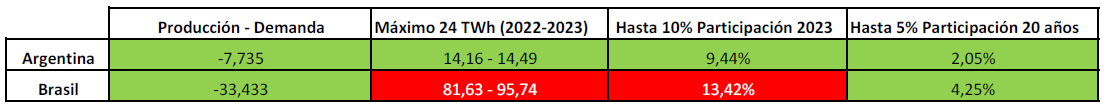